<a href="https://colab.research.google.com/github/UnitForDataScience/ML-DL-Open-Lab-Series/blob/main/Supervised_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NFL Score Prediction with Machine Learning**

# Problem Statement

## Overview
In this study, we aim to develop predictive models for scoring outcomes in football games. Specifically, we formulate two regression problems:

1. **Predicting Home Team Score (`score_home`)**  
2. **Predicting Away Team Score (`score_away`)**


## Objective
The primary objective is to build regression models that can accurately predict the final scores of the home and away teams based on various in-game performance metrics. These models can be useful for analysts, coaches, and betting markets to understand the key drivers of scoring in football games.

## Data and Features

### Predicting Away Team Score
The outcome variable for this model is `score_away`, representing the final score of the away team. The features variables include:

- First downs: total, from passing, from rushing, from penalties
- Third and fourth down completions and attempts
- Total number of plays and drives
- Total yards gained
- Passing statistics: completions, attempts, yards gained
- Sack statistics: number of sacks, yards lost due to sacks
- Rushing statistics: attempts and yards gained
- Penalty statistics: number and yards lost
- Red zone efficiency: completions and attempts
- Turnovers: fumbles lost and interceptions
- Defensive/special team touchdowns



### Predicting Home Team Score
The target variable for this model is `score_home`, representing the final score of the home team. The features variables include the same categories as for the away team, but specific to the home team:

- First downs: total, from passing, from rushing, from penalties
- Third and fourth down completions and attempts
- Total number of plays and drives
- Total yards gained
- Passing statistics: completions, attempts, yards gained
- Sack statistics: number of sacks, yards lost due to sacks
- Rushing statistics: attempts and yards gained
- Penalty statistics: number and yards lost
- Red zone efficiency: completions and attempts
- Turnovers: fumbles lost and interceptions
- Defensive/special team touchdowns



## Expected Outcome
By analyzing relationships between these game performance metrics and scoring outcomes, we aim to:

- Identify key predictors that significantly influence team scoring.
- Compare the relative importance of various features for home and away teams.
- Develop regression models that provide reliable predictions of football game scores.

This study contributes to sports analytics by leveraging machine learning techniques to enhance score prediction accuracy, which can be applied in performance evaluation, strategic planning, and betting analysis.


In [29]:
### visualization
import matplotlib.pyplot as plt
import seaborn as sns

### data manupulation
import pandas as pd
import numpy as np

### models for regression tasks
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.svm import SVR

### Ensemble Learning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor,ExtraTreesRegressor, VotingRegressor


import warnings
warnings.filterwarnings('ignore')

In [30]:
#from google.colab import drive
#drive.mount('/content/drive')

### Load Data

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/UnitForDataScience/ML-DL-Open-Lab-Series/refs/heads/main/Open%20Lab%203/nfl.csv')
df

season        week        date  time_et  neutral        away  \
0       2002           1  2002-09-05  8:30 PM    False       49ers   
1       2002           1  2002-09-08  1:00 PM    False       Colts   
2       2002           1  2002-09-08  1:00 PM    False   Cardinals   
3       2002           1  2002-09-08  1:00 PM    False       Lions   
4       2002           1  2002-09-08  1:00 PM    False      Eagles   
...      ...         ...         ...      ...      ...         ...   
5924    2023    Division  2024-01-21  3:00 PM    False  Buccaneers   
5925    2023    Division  2024-01-21  6:30 PM    False      Chiefs   
5926    2023  Conference  2024-01-28  3:00 PM    False      Chiefs   
5927    2023  Conference  2024-01-28  6:30 PM    False       Lions   
5928    2023   Superbowl  2024-02-11  6:30 PM     True       49ers   

            home  score_away  score_home  first_downs_away  ...  \
0         Giants          16          13                13  ...   
1        Jaguars          28          25                18  ...   
2     Commanders          23          31                14  ...   
3       Dolphins          21          49                15  ...   
4         Titans          24          27                17  ...   
...          ...         ...         ...               ...  ...   
5924       Lions          23          31                23  ...   
5925       Bills          27          24                21  ...   
5926      Ravens          17          10                22  ...   
5927       49ers          31          34                28  ...   
5928      Chiefs          22          25                23  ...   

      redzone_comp_home  redzone_att_home  fumbles_away  fumbles_home  \
0                     0                 6             0             0   
1                     0                 8             2             1   
2                     0                 8             0             0   
3                     0                 8             1             0   
4                     0                 7             1             3   
...                 ...               ...           ...           ...   
5924                  3                 4             0             0   
5925                  3                 4             1             0   
5926                  0                 1             0             2   
5927                  4                 5             1             0   
5928                  2                 6             2             1   

      interceptions_away  interceptions_home  def_st_td_away  def_st_td_home  \
0                      1                   3               0               0   
1                      0                   1               2               0   
2                      1                   1               0               0   
3                      1                   0               0               2   
4                      2                   1               0               0   
...                  ...                 ...             ...             ...   
5924                   2                   0               0               0   
5925                   0                   0               0               0   
5926                   0                   1               0               0   
5927                   0                   1               0               0   
5928                   0                   1               0               0   

      possession_away  possession_home  
0               27:32            32:28  
1               27:27            32:33  
2               25:36            34:24  
3               25:36            34:24  
4               29:12            30:48  
...               ...              ...  
5924            28:00            32:00  
5925            22:57            37:03  
5926            37:30            22:30  
5927            27:48            32:12  
5928            38:31            36:26  

[5929 rows x 61 columns]

In [32]:
df.columns

Index(['season', 'week', 'date', 'time_et', 'neutral', 'away', 'home',
       'score_away', 'score_home', 'first_downs_away', 'first_downs_home',
       'first_downs_from_passing_away', 'first_downs_from_passing_home',
       'first_downs_from_rushing_away', 'first_downs_from_rushing_home',
       'first_downs_from_penalty_away', 'first_downs_from_penalty_home',
       'third_down_comp_away', 'third_down_att_away', 'third_down_comp_home',
       'third_down_att_home', 'fourth_down_comp_away', 'fourth_down_att_away',
       'fourth_down_comp_home', 'fourth_down_att_home', 'plays_away',
       'plays_home', 'drives_away', 'drives_home', 'yards_away', 'yards_home',
       'pass_comp_away', 'pass_att_away', 'pass_yards_away', 'pass_comp_home',
       'pass_att_home', 'pass_yards_home', 'sacks_num_away',
       'sacks_yards_away', 'sacks_num_home', 'sacks_yards_home',
       'rush_att_away', 'rush_yards_away', 'rush_att_home', 'rush_yards_home',
       'pen_num_away', 'pen_yards_away', 'pen

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   season                         5929 non-null   int64 
 1   week                           5929 non-null   object
 2   date                           5929 non-null   object
 3   time_et                        5929 non-null   object
 4   neutral                        5929 non-null   bool  
 5   away                           5929 non-null   object
 6   home                           5929 non-null   object
 7   score_away                     5929 non-null   int64 
 8   score_home                     5929 non-null   int64 
 9   first_downs_away               5929 non-null   int64 
 10  first_downs_home               5929 non-null   int64 
 11  first_downs_from_passing_away  5929 non-null   int64 
 12  first_downs_from_passing_home  5929 non-null   int64 
 13  fir

## Explanatory Data Analysis

### Distribution of Target Variable

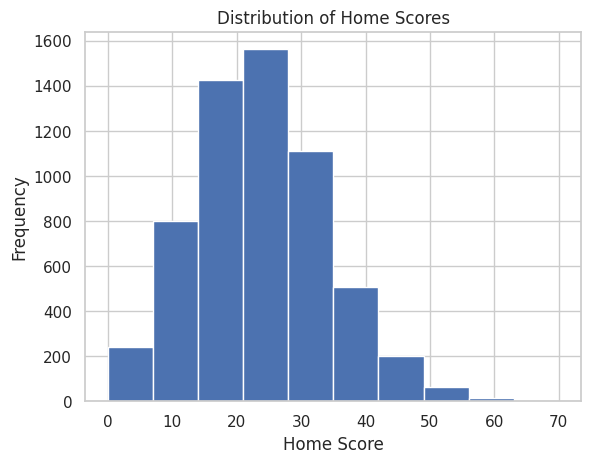

In [34]:
df["score_home"].hist()
plt.title("Distribution of Home Scores")
plt.xlabel("Home Score")
plt.ylabel("Frequency")
plt.show()

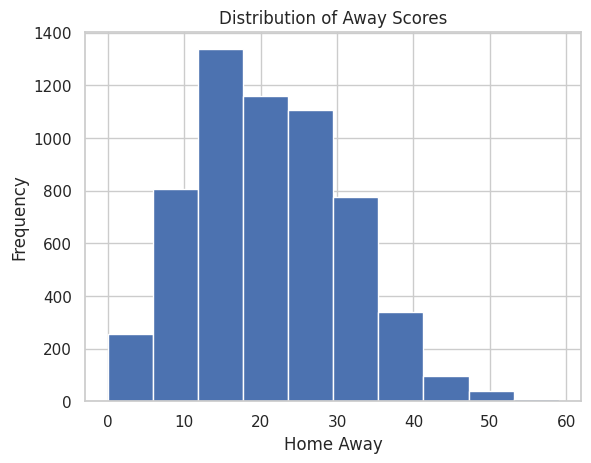

In [35]:
df["score_away"].hist()
plt.title("Distribution of Away Scores")
plt.xlabel("Home Away")
plt.ylabel("Frequency")
plt.show()

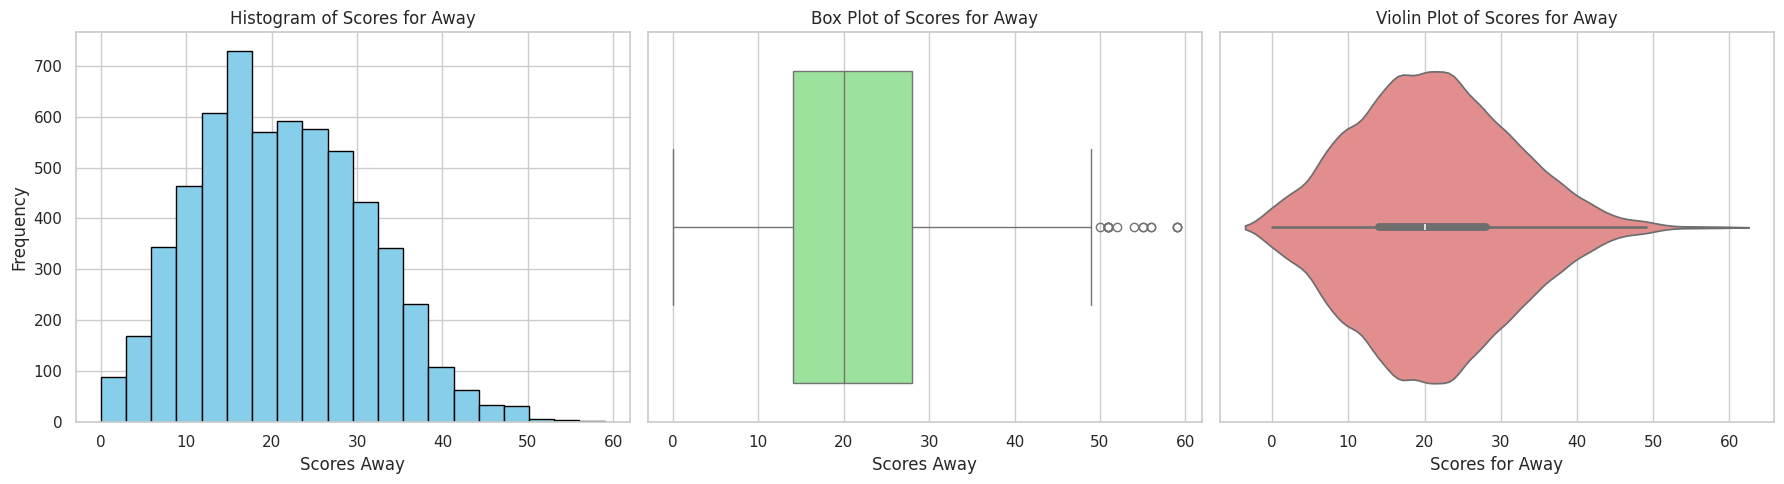

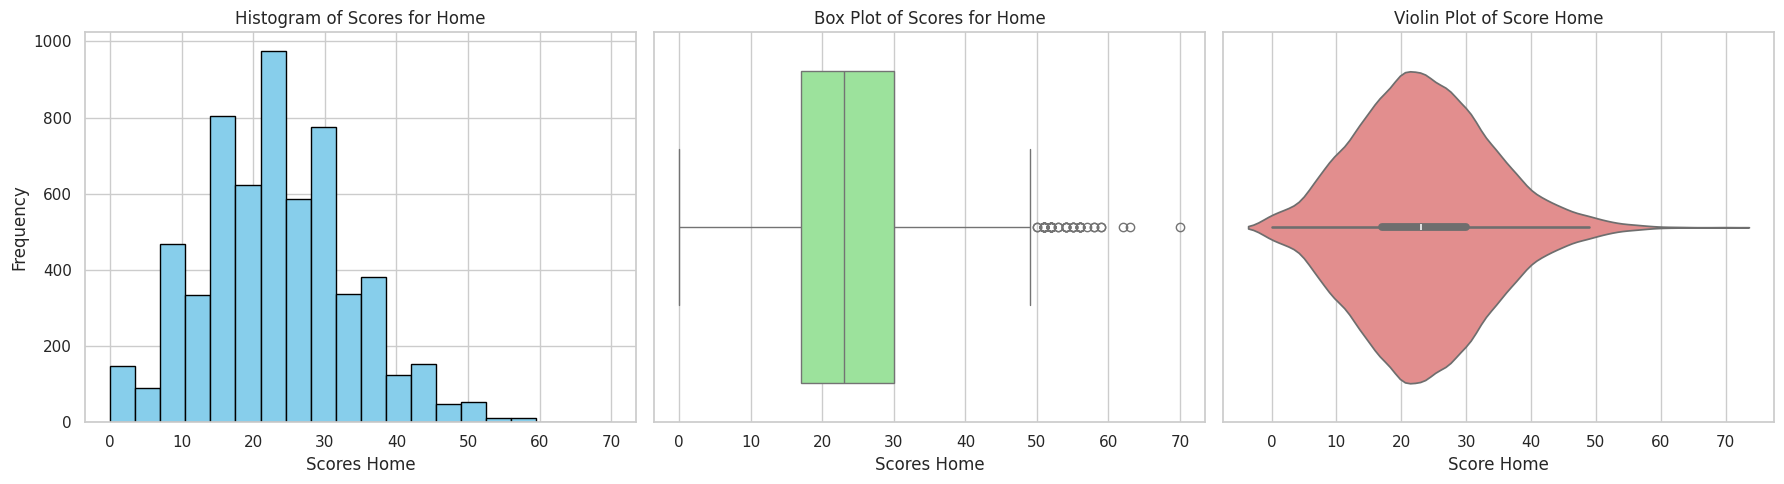

In [36]:
### set style for seaborn
sns.set(style="whitegrid")

### plot for score_away
plt.figure(figsize=(18, 5))

### histogram for score_away
plt.subplot(1, 3, 1)
plt.hist(df['score_away'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scores Away')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Away')

### box plot for score_away
plt.subplot(1, 3, 2)
sns.boxplot(x=df['score_away'], color='lightgreen')
plt.xlabel('Scores Away')
plt.title('Box Plot of Scores for Away')

### violin plot for score_away
plt.subplot(1, 3, 3)
sns.violinplot(x=df['score_away'], color='lightcoral')
plt.xlabel('Scores for Away')
plt.title('Violin Plot of Scores for Away')

plt.tight_layout()
plt.show()

### plot for score_home
plt.figure(figsize=(18, 5))

### histogram for score_home
plt.subplot(1, 3, 1)
plt.hist(df['score_home'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scores Home')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Home')

### box plot for score_home
plt.subplot(1, 3, 2)
sns.boxplot(x=df['score_home'], color='lightgreen')
plt.xlabel('Scores Home')
plt.title('Box Plot of Scores for Home')

### violin plot for score_home
plt.subplot(1, 3, 3)
sns.violinplot(x=df['score_home'], color='lightcoral')
plt.xlabel('Score Home')
plt.title('Violin Plot of Score Home')

plt.tight_layout()
plt.show()

### Target Variable vs Feactures: Scatterplots

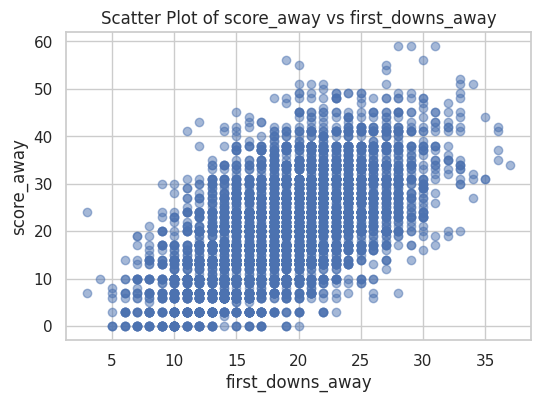

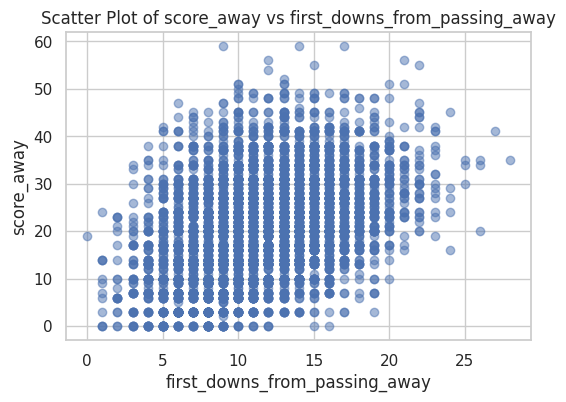

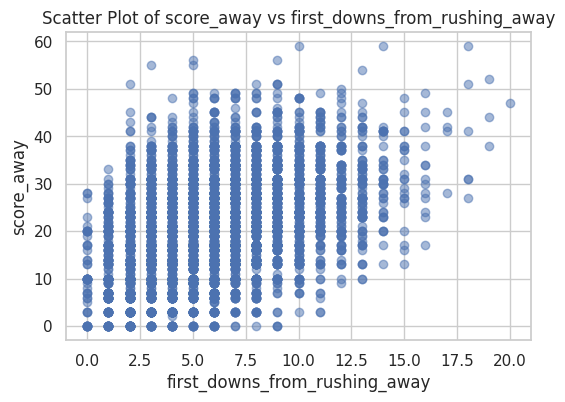

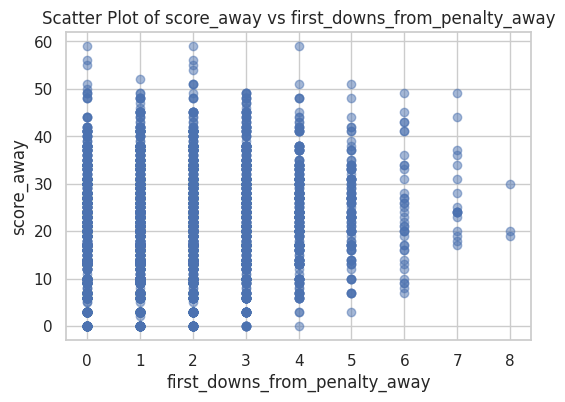

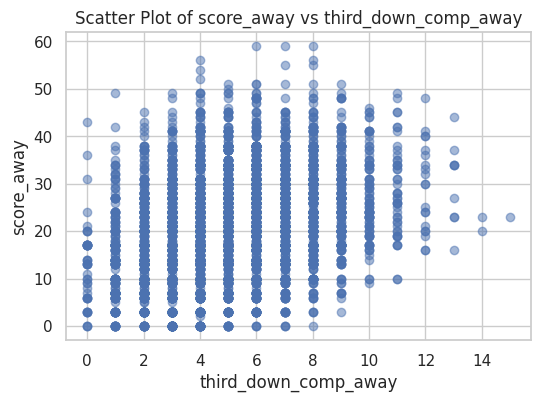

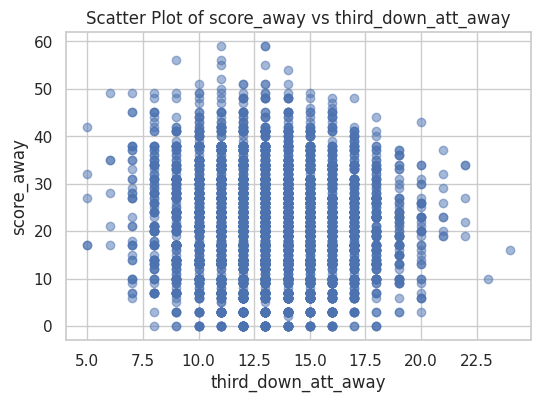

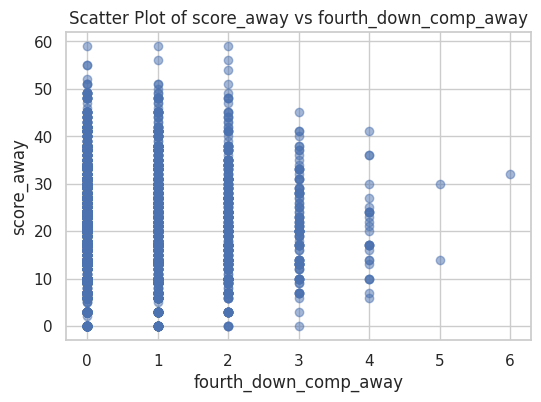

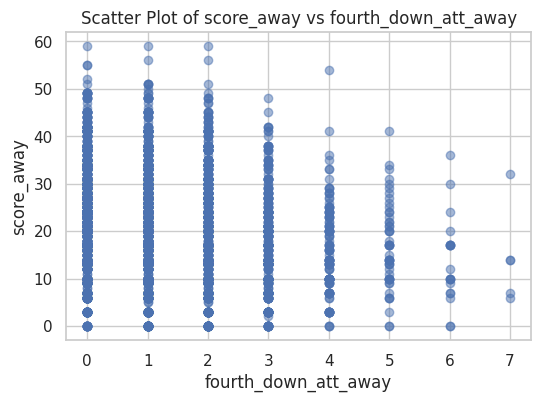

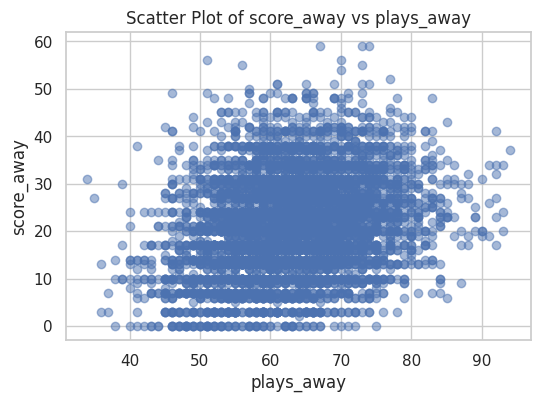

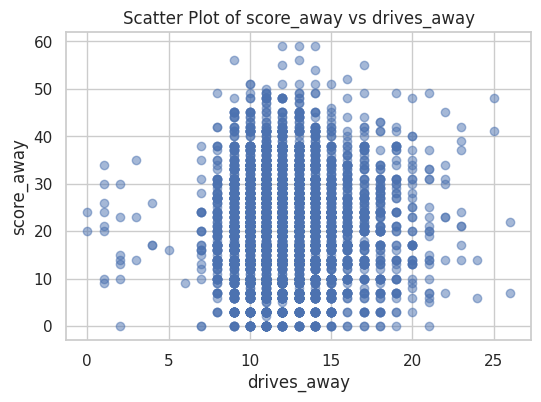

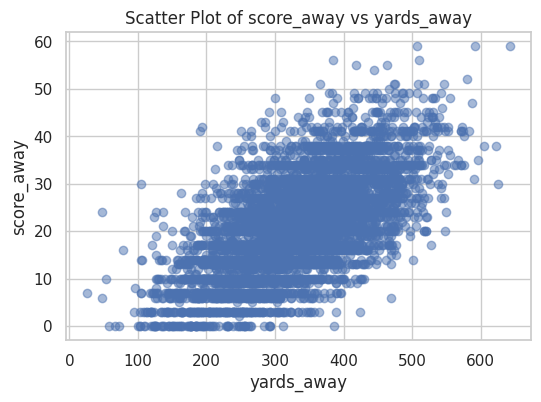

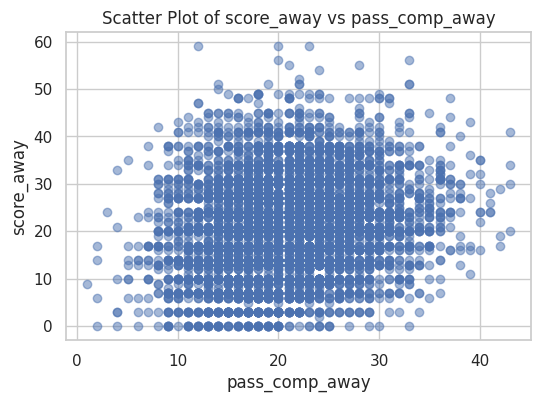

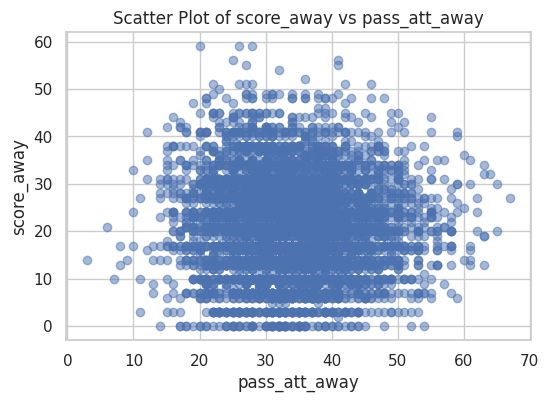

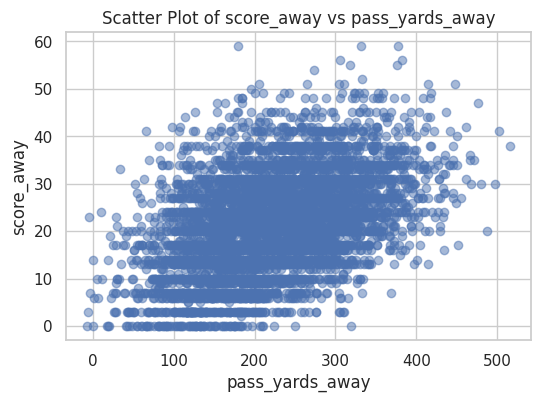

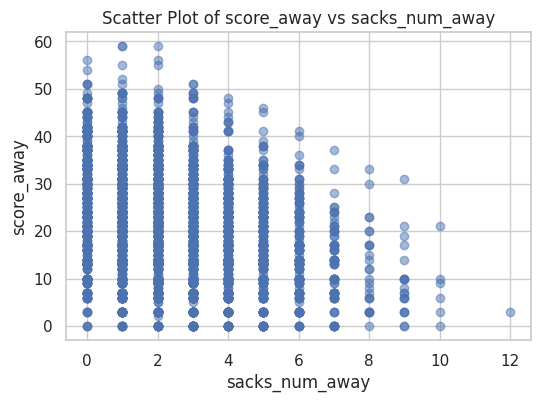

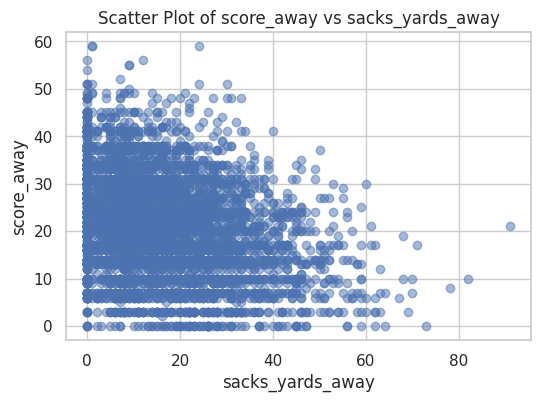

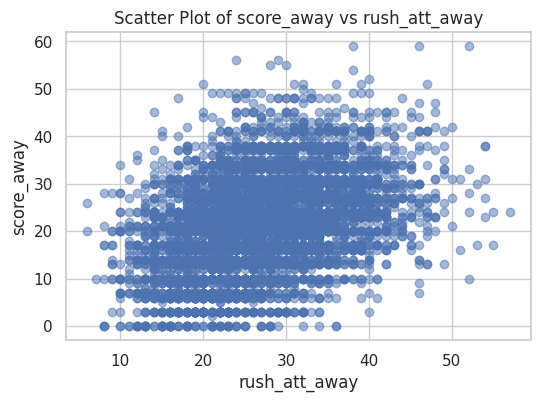

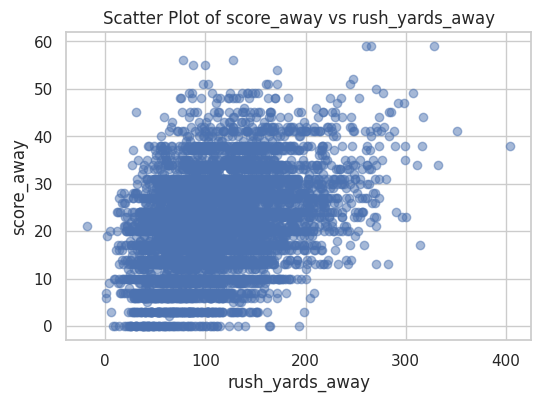

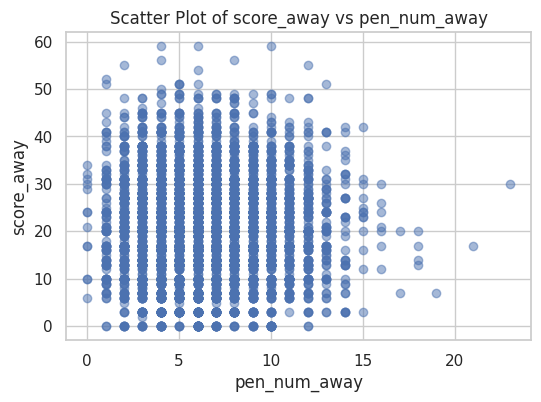

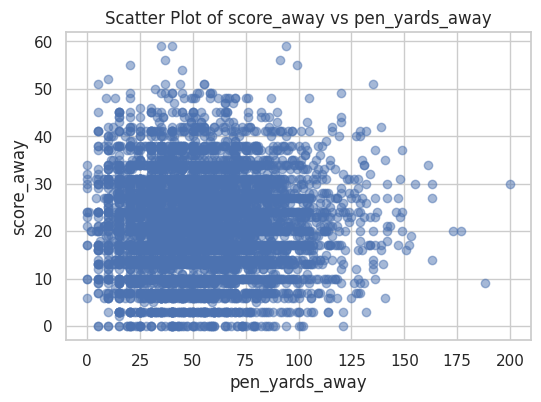

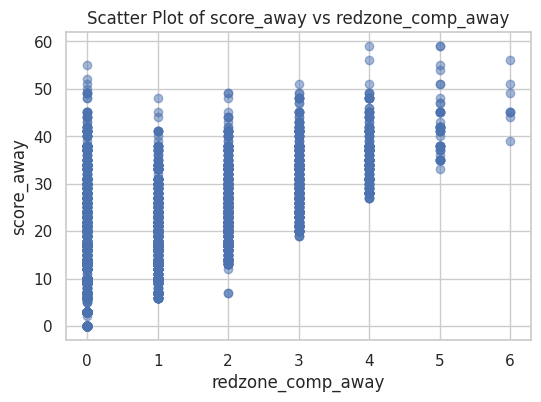

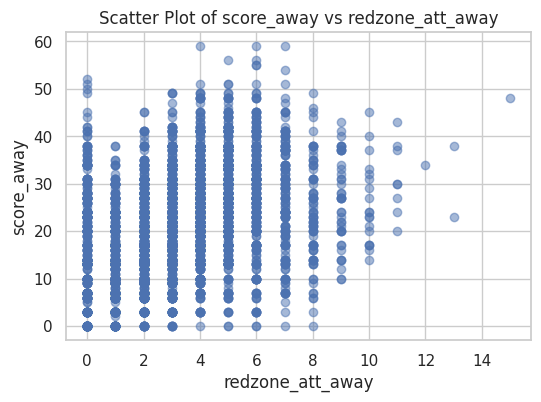

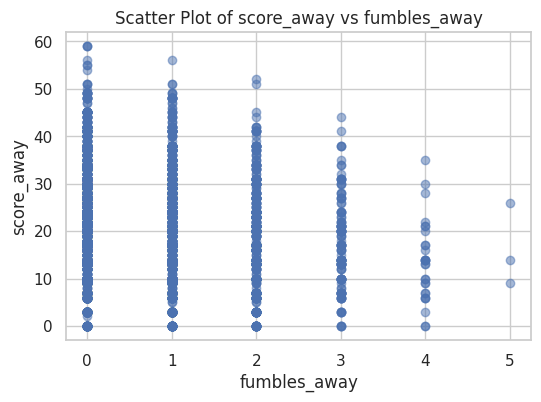

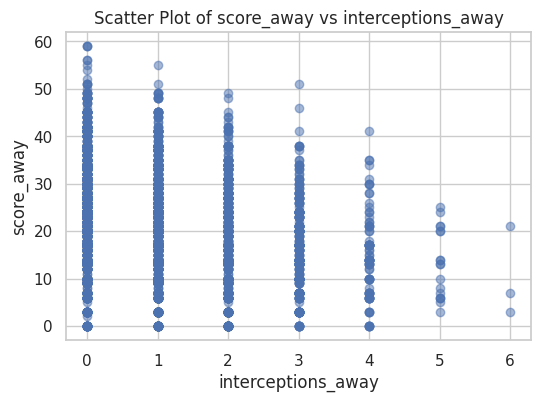

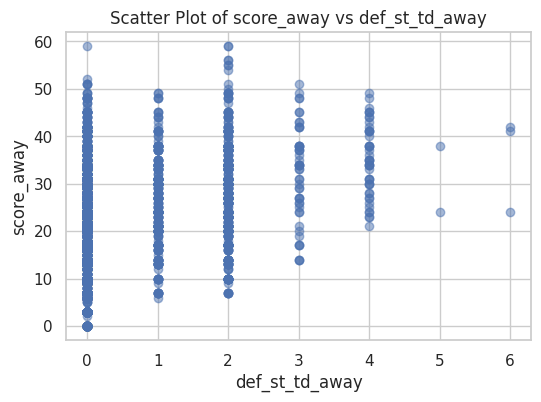

In [37]:
###### away


### define lists of predictors
features_away = ['first_downs_away', 'first_downs_from_passing_away', 'first_downs_from_rushing_away',
                 'first_downs_from_penalty_away', 'third_down_comp_away', 'third_down_att_away',
                 'fourth_down_comp_away', 'fourth_down_att_away', 'plays_away', 'drives_away',
                 'yards_away', 'pass_comp_away', 'pass_att_away', 'pass_yards_away', 'sacks_num_away',
                 'sacks_yards_away', 'rush_att_away', 'rush_yards_away', 'pen_num_away', 'pen_yards_away',
                 'redzone_comp_away', 'redzone_att_away', 'fumbles_away', 'interceptions_away', 'def_st_td_away']



### scatter plots for score_away against each predictor
for feature in features_away:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['score_away'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('score_away')
    plt.title(f'Scatter Plot of score_away vs {feature}')
    plt.show()


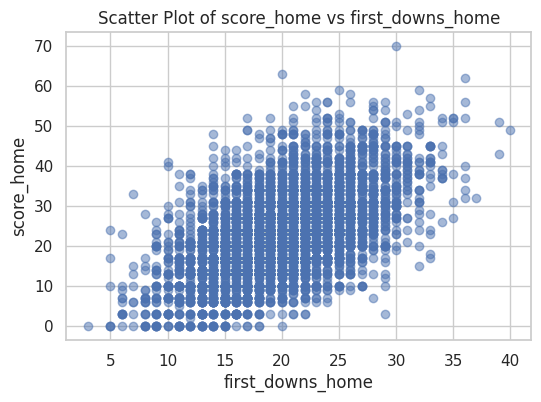

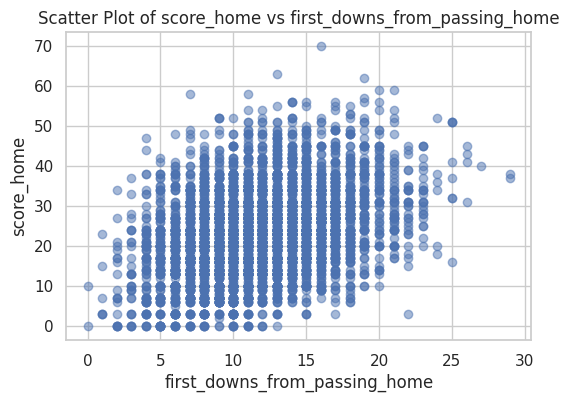

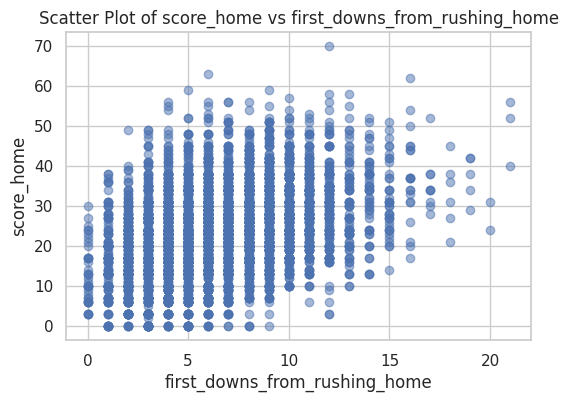

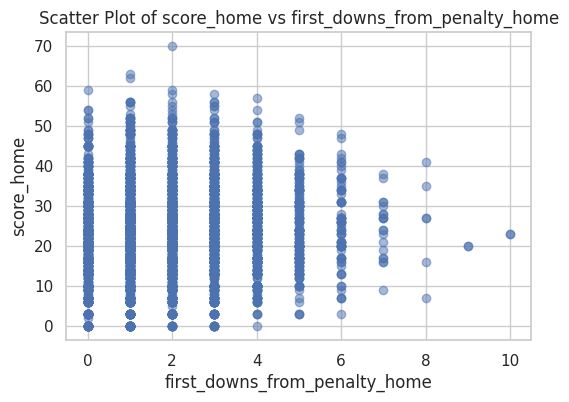

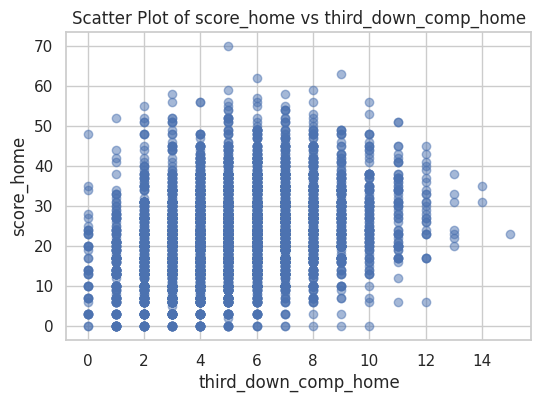

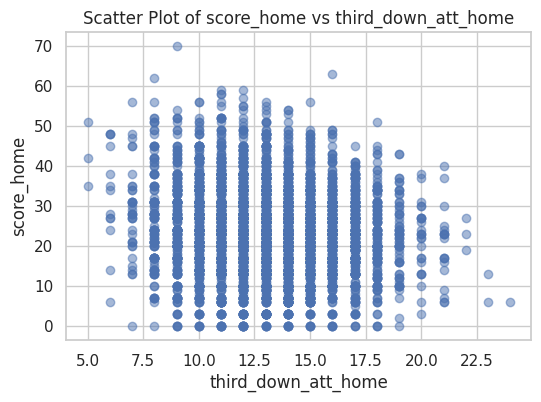

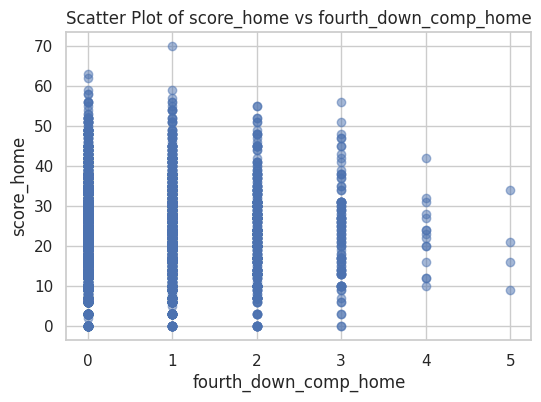

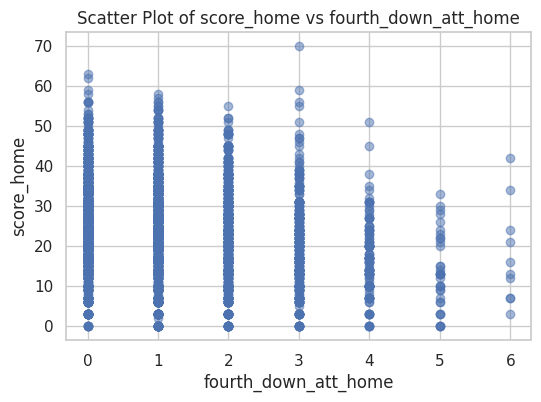

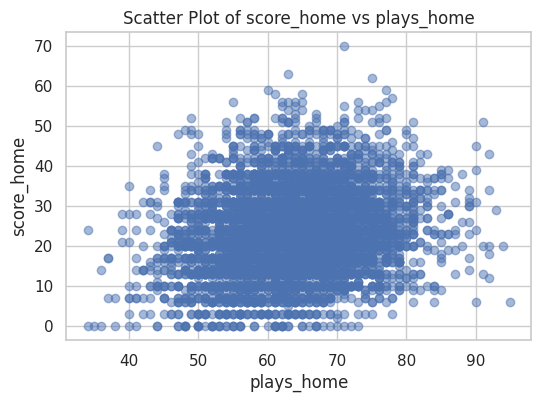

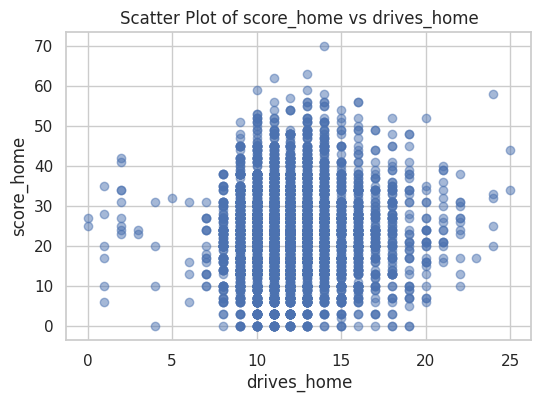

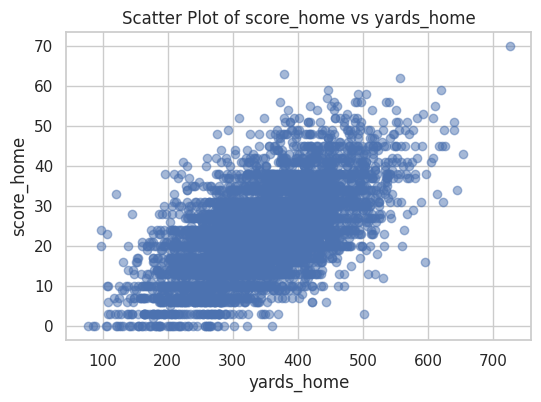

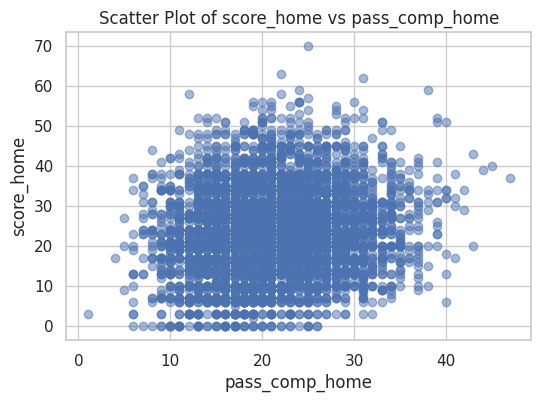

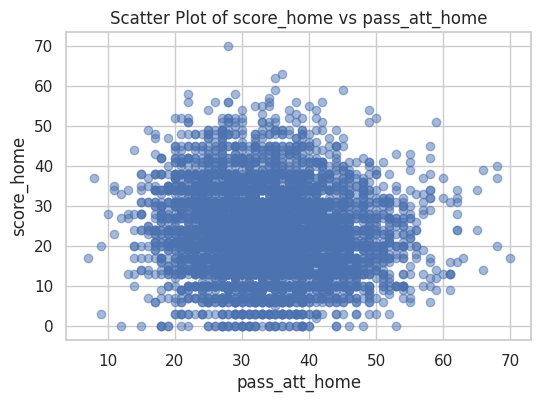

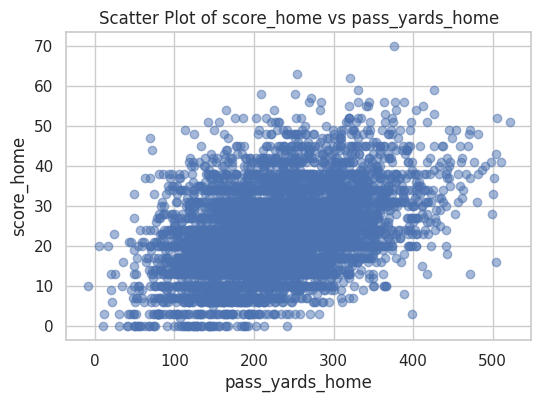

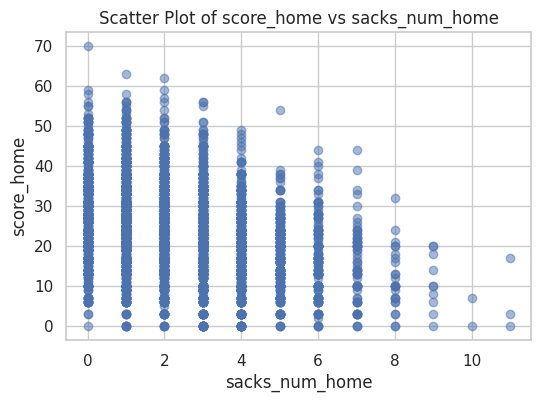

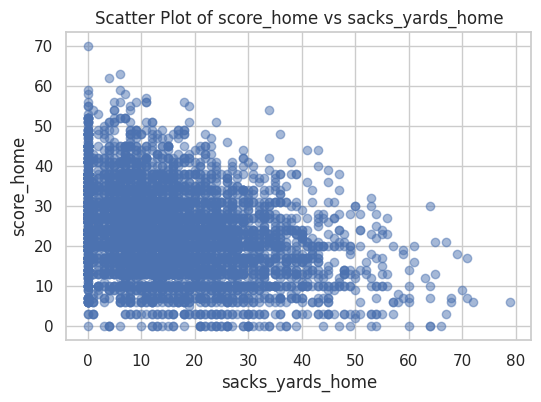

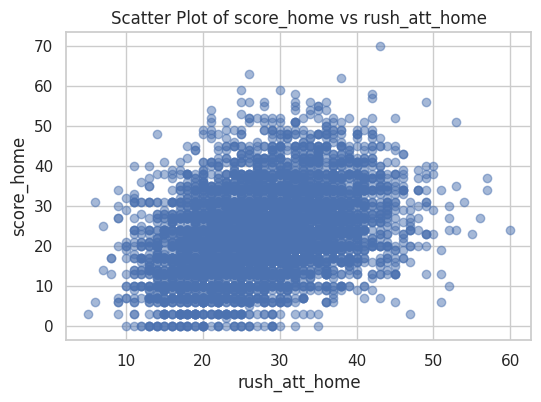

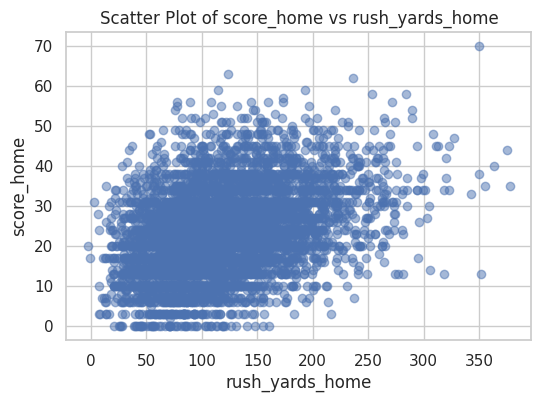

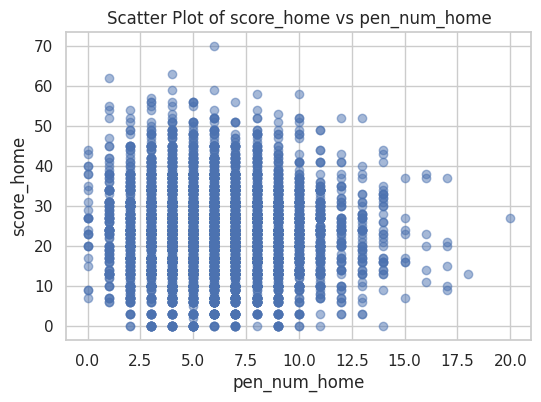

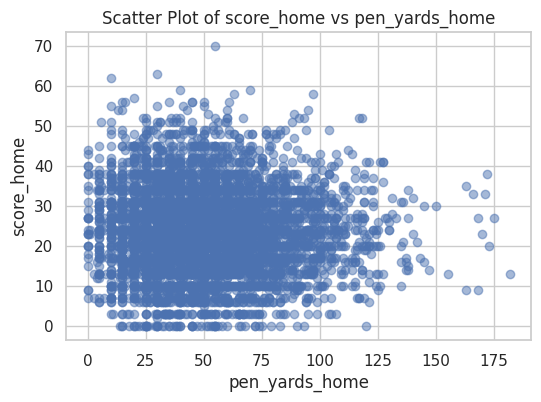

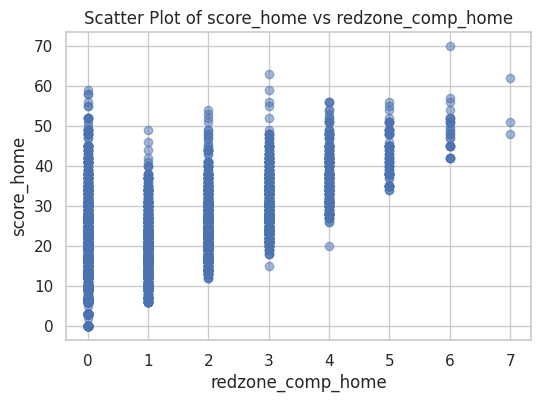

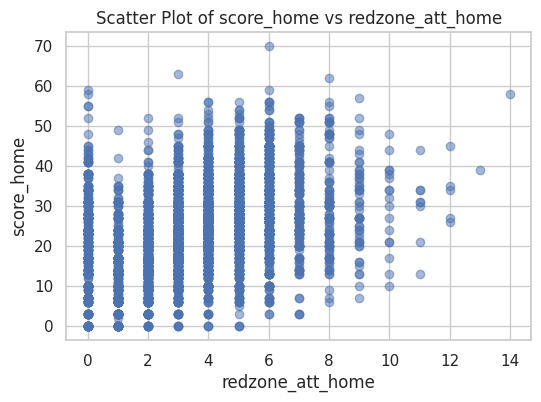

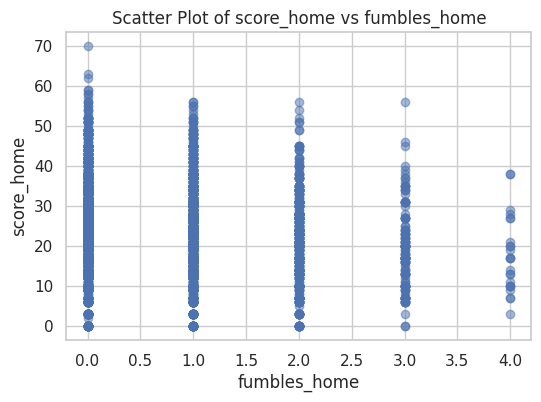

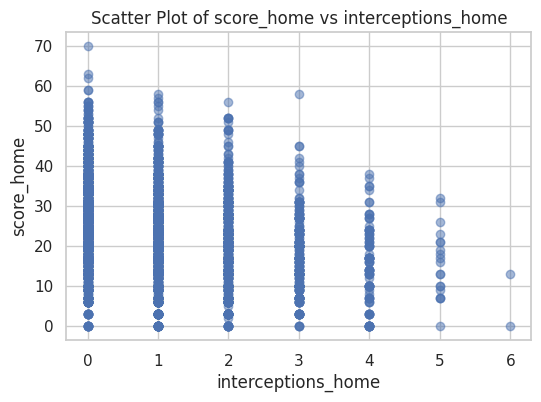

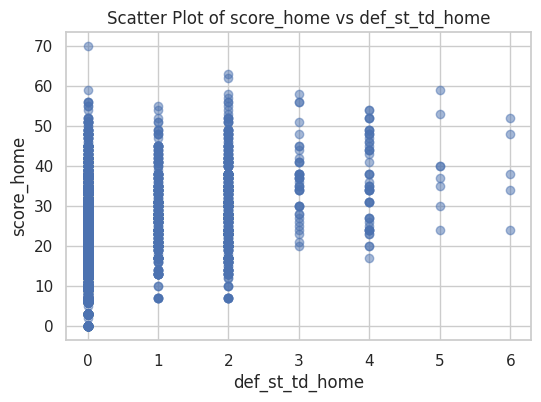

In [38]:
######### home


features_home = ['first_downs_home', 'first_downs_from_passing_home', 'first_downs_from_rushing_home',
                 'first_downs_from_penalty_home', 'third_down_comp_home', 'third_down_att_home',
                 'fourth_down_comp_home', 'fourth_down_att_home', 'plays_home', 'drives_home',
                 'yards_home', 'pass_comp_home', 'pass_att_home', 'pass_yards_home', 'sacks_num_home',
                 'sacks_yards_home', 'rush_att_home', 'rush_yards_home', 'pen_num_home', 'pen_yards_home',
                 'redzone_comp_home', 'redzone_att_home', 'fumbles_home', 'interceptions_home', 'def_st_td_home']


### scatter plots for score_home
for feature in features_home:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['score_home'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('score_home')
    plt.title(f'Scatter Plot of score_home vs {feature}')
    plt.show()

## Pre-Processing

In [39]:
### here is function to convert time cols to seconds
### this needs to be done as time cols are given min:sec format(e.g. 23:22)

def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))  ### split time string into minutes(23) and seconds(22)
    return minutes * 60 + seconds                     ### then convert minutes to seconds and add seconds(23*60+22)

In [40]:
### now apply function to convert possession columns to seconds(apply method from pandas)
df['time_away'] = df['possession_away'].apply(time_to_seconds)
df['time_home'] = df['possession_home'].apply(time_to_seconds)

In [41]:
### prepare all variables


### for score_away model
X_away = df[['first_downs_away', 'first_downs_from_passing_away', 'first_downs_from_rushing_away',
             'first_downs_from_penalty_away', 'third_down_comp_away', 'third_down_att_away',
             'fourth_down_comp_away', 'fourth_down_att_away', 'plays_away', 'drives_away',
             'yards_away', 'pass_comp_away', 'pass_att_away', 'pass_yards_away', 'sacks_num_away',
             'sacks_yards_away', 'rush_att_away', 'rush_yards_away', 'pen_num_away', 'pen_yards_away',
             'redzone_comp_away', 'redzone_att_away', 'fumbles_away', 'interceptions_away', 'def_st_td_away']]
y_away = df['score_away']

### for score_home model
X_home = df[['first_downs_home', 'first_downs_from_passing_home', 'first_downs_from_rushing_home',
             'first_downs_from_penalty_home', 'third_down_comp_home', 'third_down_att_home',
             'fourth_down_comp_home', 'fourth_down_att_home', 'plays_home', 'drives_home',
             'yards_home', 'pass_comp_home', 'pass_att_home', 'pass_yards_home', 'sacks_num_home',
             'sacks_yards_home', 'rush_att_home', 'rush_yards_home', 'pen_num_home', 'pen_yards_home',
             'redzone_comp_home', 'redzone_att_home', 'fumbles_home', 'interceptions_home', 'def_st_td_home']]
y_home = df['score_home']


### Correlations

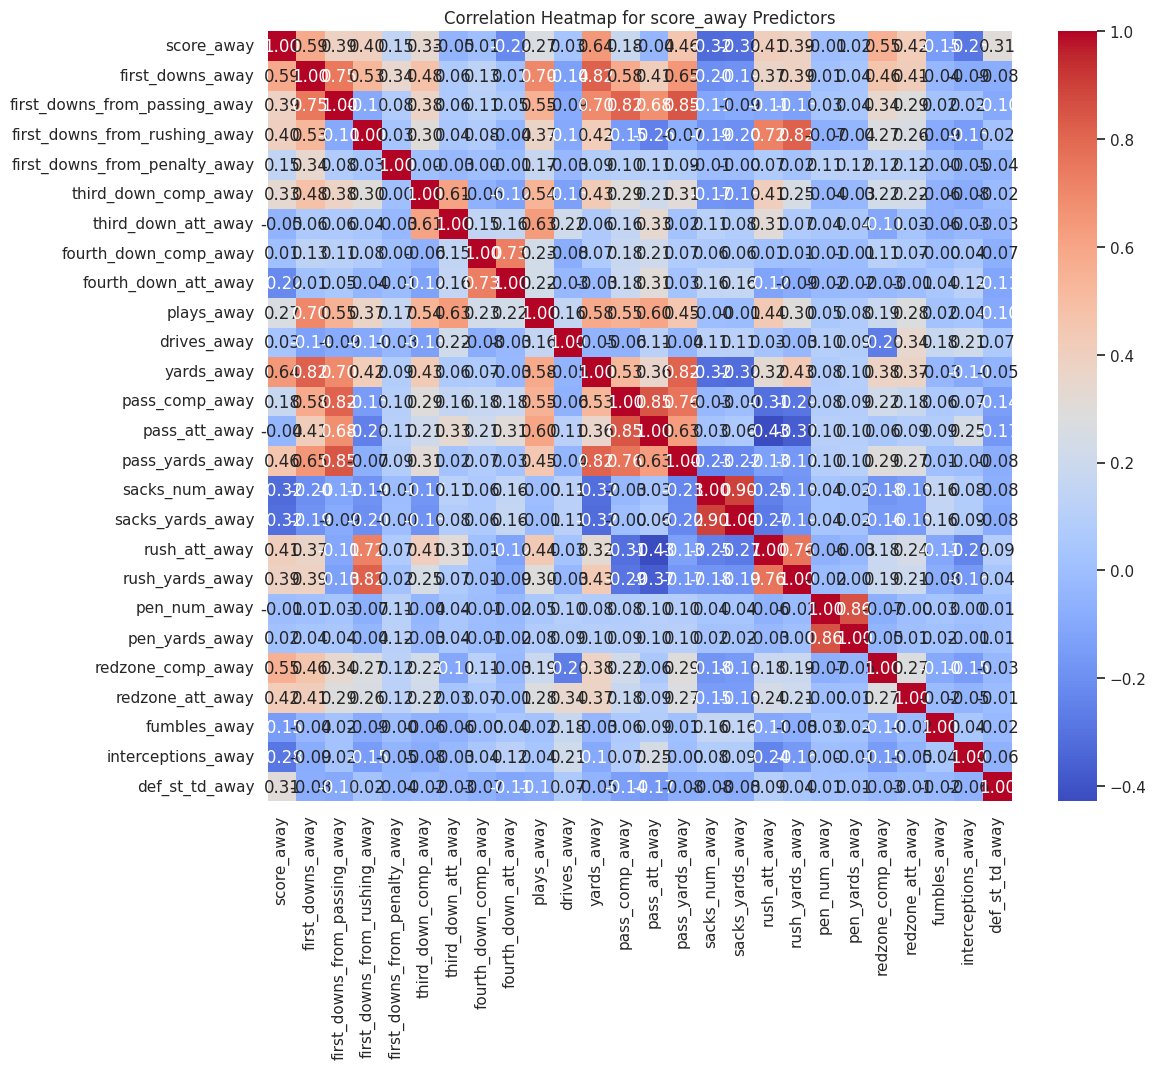

In [42]:
######## Away

### obrtain correlation matrix
corr_away = df[['score_away', 'first_downs_away', 'first_downs_from_passing_away', 'first_downs_from_rushing_away',
                'first_downs_from_penalty_away', 'third_down_comp_away', 'third_down_att_away', 'fourth_down_comp_away',
                'fourth_down_att_away', 'plays_away', 'drives_away', 'yards_away', 'pass_comp_away', 'pass_att_away',
                'pass_yards_away', 'sacks_num_away', 'sacks_yards_away', 'rush_att_away', 'rush_yards_away',
                'pen_num_away', 'pen_yards_away', 'redzone_comp_away', 'redzone_att_away', 'fumbles_away',
                'interceptions_away', 'def_st_td_away']].corr()

### plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_away, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for score_away Predictors")
plt.show()

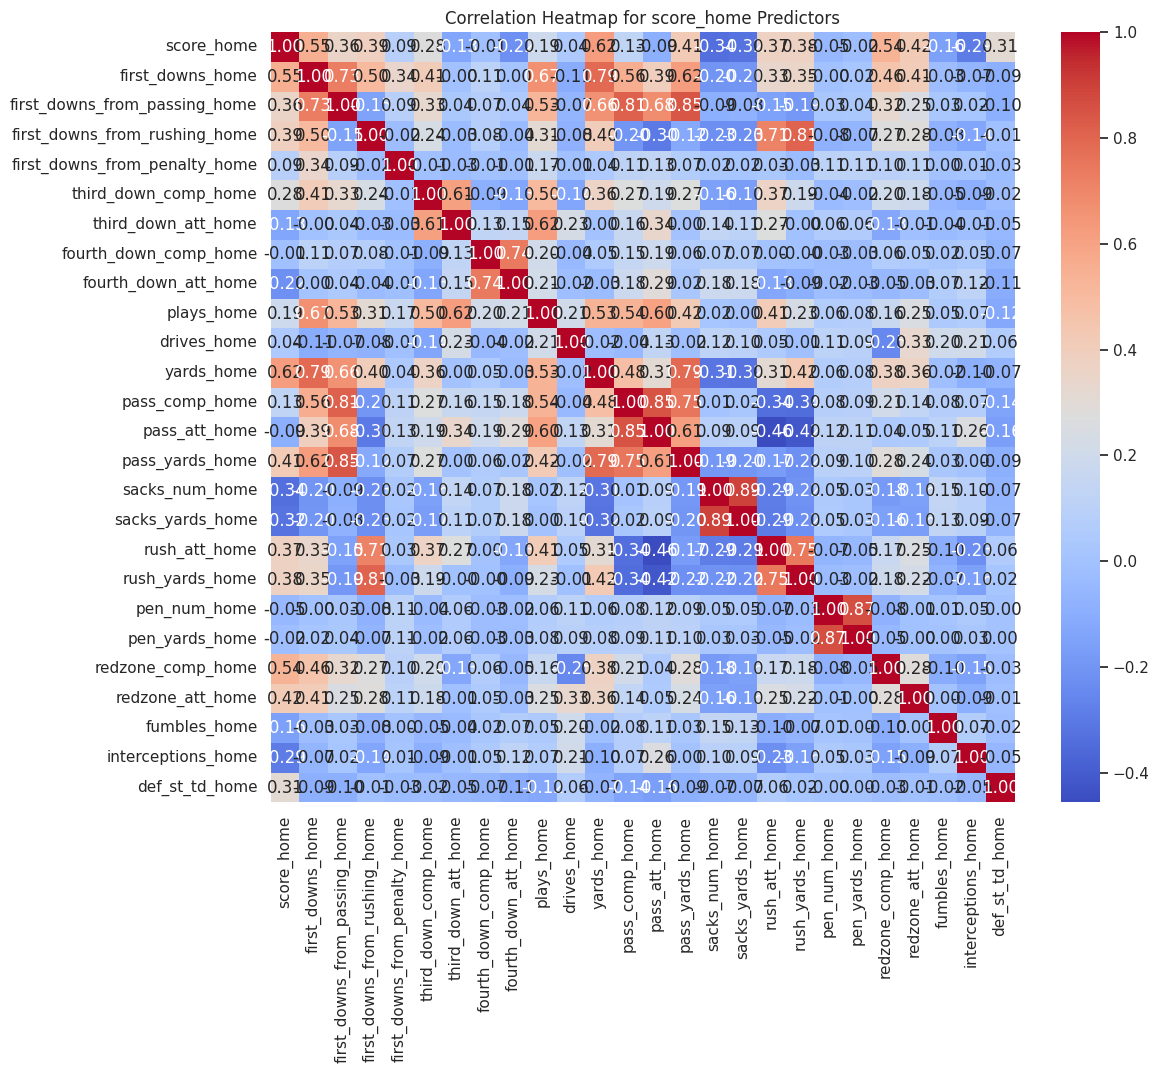

In [43]:
####### Home

### calculate correlation matrix for score_home predictors
corr_home = df[['score_home', 'first_downs_home', 'first_downs_from_passing_home', 'first_downs_from_rushing_home',
                'first_downs_from_penalty_home', 'third_down_comp_home', 'third_down_att_home', 'fourth_down_comp_home',
                'fourth_down_att_home', 'plays_home', 'drives_home', 'yards_home', 'pass_comp_home', 'pass_att_home',
                'pass_yards_home', 'sacks_num_home', 'sacks_yards_home', 'rush_att_home', 'rush_yards_home',
                'pen_num_home', 'pen_yards_home', 'redzone_comp_home', 'redzone_att_home', 'fumbles_home',
                'interceptions_home', 'def_st_td_home']].corr()

### plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_home, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for score_home Predictors")
plt.show()

In [44]:
### split data into training and test sets
X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, test_size=0.2, random_state=42)
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X_home, y_home, test_size=0.2, random_state=42)

In [45]:
### standardize features
scaler_standard = StandardScaler()

X_train_home = scaler_standard.fit_transform(X_train_home)
X_test_home = scaler_standard.transform(X_test_home)



X_train_away = scaler_standard.fit_transform(X_train_away)
X_test_away = scaler_standard.transform(X_test_away)

## Machine Learning Models for Regression Tasks

### Decision Tree Regressor



In [46]:
### initialize Decision Tree Regressor
dt_regressor_home = DecisionTreeRegressor(random_state=42)
dt_regressor_away = DecisionTreeRegressor(random_state=42)

### fit model on training data
dt_regressor_home.fit(X_train_home, y_train_home)
dt_regressor_away.fit(X_train_away, y_train_away)

### predict on test data
y_pred_home = dt_regressor_home.predict(X_test_home)
y_pred_away = dt_regressor_away.predict(X_test_away)

### evaluate model
mse_home = mean_squared_error(y_test_home, y_pred_home)
r2_home = r2_score(y_test_home, y_pred_home)

mse_away = mean_squared_error(y_test_away, y_pred_away)
r2_away = r2_score(y_test_away, y_pred_away)

print("Home Data - Mean Squared Error:", mse_home)
print("Home Data - R^2 Score:", r2_home)

print("Away Data - Mean Squared Error:", mse_away)
print("Away Data - R^2 Score:", r2_away)

Home Data - Mean Squared Error: 56.747048903878586
Home Data - R^2 Score: 0.48036793672663236
Away Data - Mean Squared Error: 51.714165261382796
Away Data - R^2 Score: 0.472292430783274


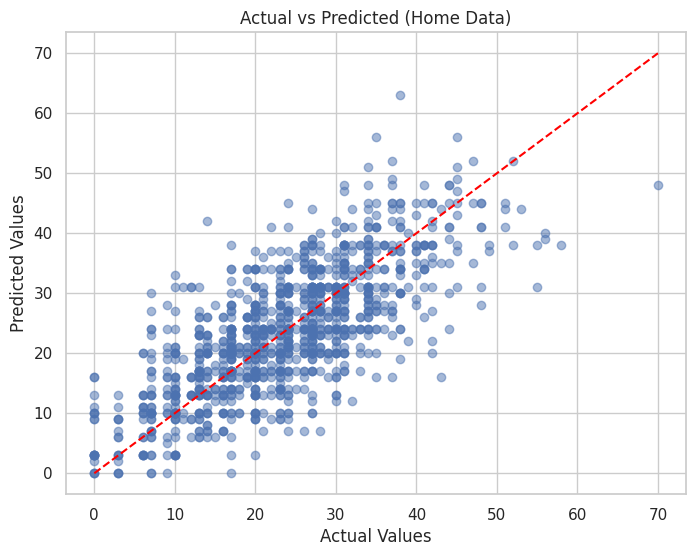

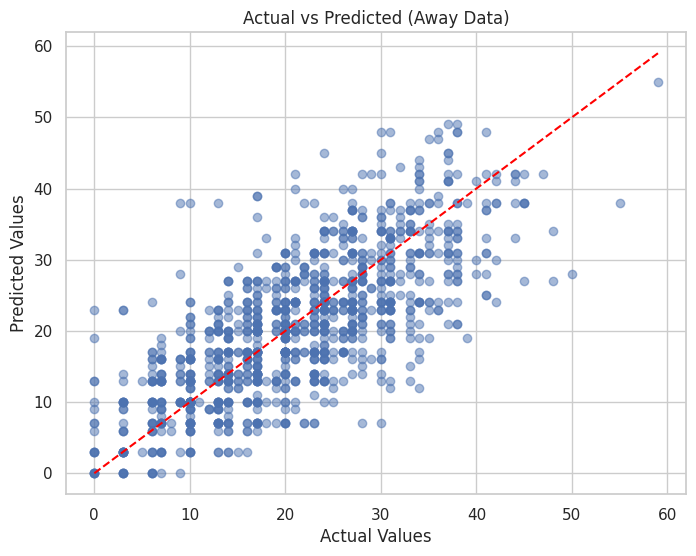

In [47]:
##### Actual vs Predicted Values

### home
plt.figure(figsize=(8, 6))
plt.scatter(y_test_home, y_pred_home, alpha=0.5)
plt.plot([min(y_test_home), max(y_test_home)], [min(y_test_home), max(y_test_home)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Home Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### away
plt.figure(figsize=(8, 6))
plt.scatter(y_test_away, y_pred_away, alpha=0.5)
plt.plot([min(y_test_away), max(y_test_away)], [min(y_test_away), max(y_test_away)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Away Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

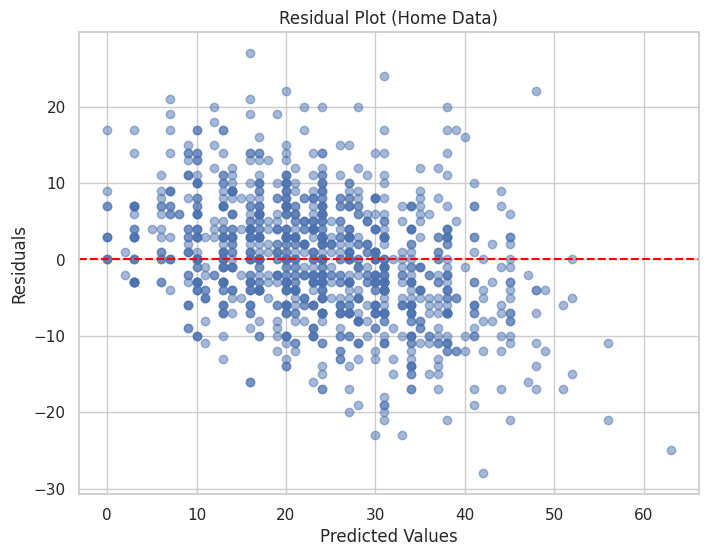

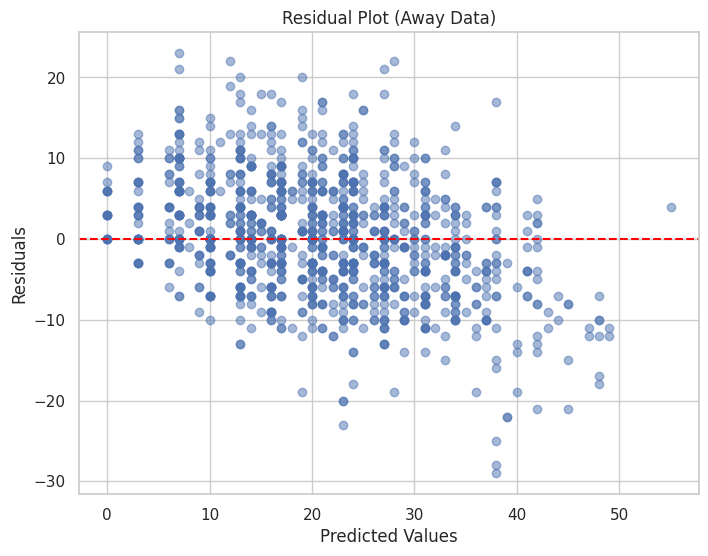

In [48]:
##### Residual Plot

### calculate residuals for home data
residuals_home = y_test_home - y_pred_home

### calculate residuals for away data
residuals_away = y_test_away - y_pred_away

### plot residuals for home data
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_home, residuals_home, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (Home Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### plot residuals for away data
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_away, residuals_away, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (Away Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

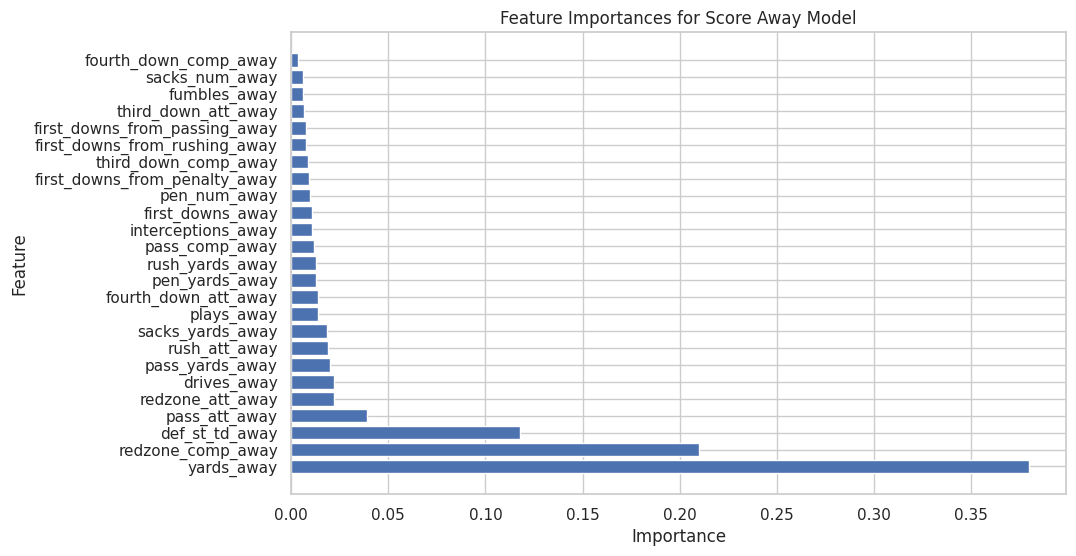

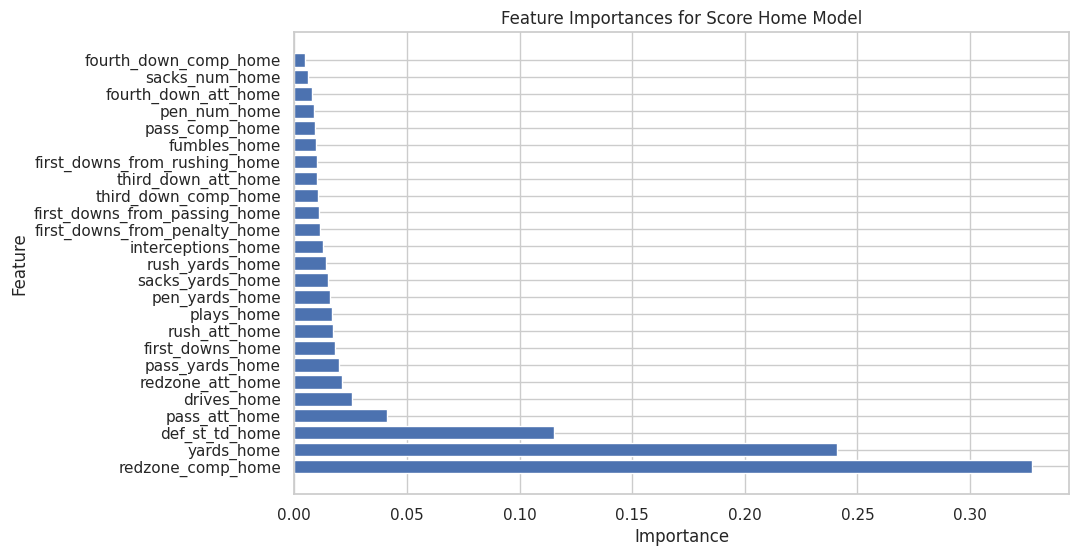

In [49]:
##### feature importance

### get feature importances for score_away model
feature_importances_away = dt_regressor_away.feature_importances_
feature_names_away = X_away.columns  ### use actual feature names from X_away

### create df for feature importances (score_away model)
importance_df_away = pd.DataFrame({
    'Feature': feature_names_away,
    'Importance': feature_importances_away
}).sort_values(by='Importance', ascending=False)

### plot feature importances for score_away model
plt.figure(figsize=(10, 6))
plt.barh(importance_df_away['Feature'], importance_df_away['Importance'])
plt.title("Feature Importances for Score Away Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



### get feature importances for score_home model
feature_importances_home = dt_regressor_home.feature_importances_
feature_names_home = X_home.columns  ### use the actual feature names from X_home

### create df for feature importances (score_home model)
importance_df_home = pd.DataFrame({
    'Feature': feature_names_home,
    'Importance': feature_importances_home
}).sort_values(by='Importance', ascending=False)

### plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df_home['Feature'], importance_df_home['Importance'])
plt.title("Feature Importances for Score Home Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### KNN Regressior

Score Away Model - Mean Squared Error: 35.93524451939292
Score Away Model - R² Score: 0.6333054891500254
Score Home Model - Mean Squared Error: 37.81180438448567
Score Home Model - R² Score: 0.6537577493821651


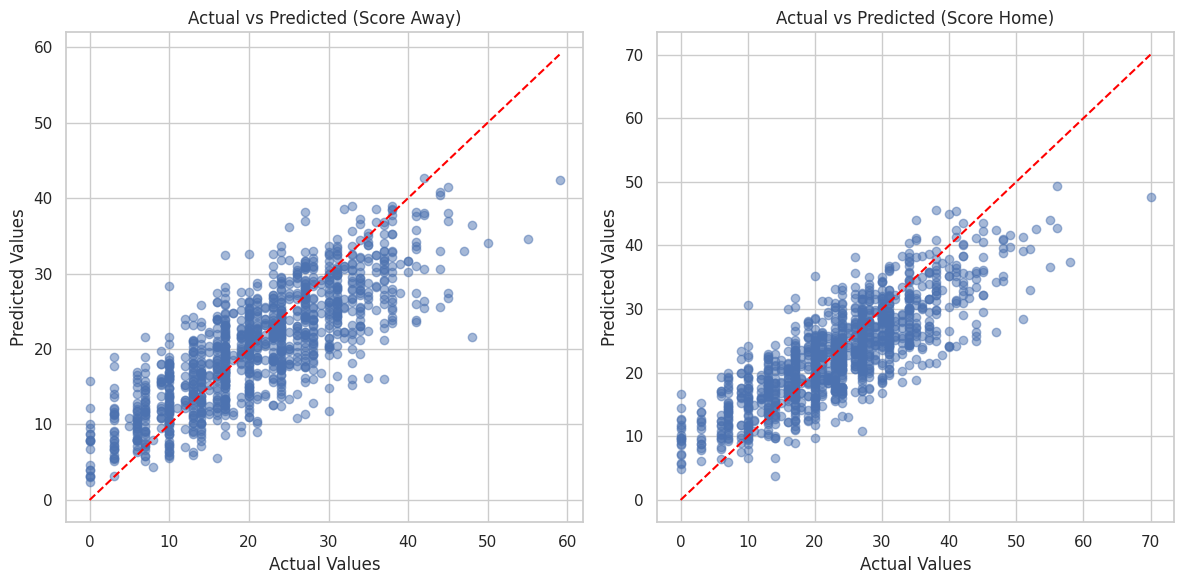

In [50]:
### initialize KNN Regressor
knn_regressor_away = KNeighborsRegressor(n_neighbors=5)  ### you can adjust n_neighbors
knn_regressor_home = KNeighborsRegressor(n_neighbors=5)

### train models
knn_regressor_away.fit(X_train_away, y_train_away)
knn_regressor_home.fit(X_train_home, y_train_home)

### make predictions
y_pred_away = knn_regressor_away.predict(X_test_away)
y_pred_home = knn_regressor_home.predict(X_test_home)

### evaluate models
mse_away = mean_squared_error(y_test_away, y_pred_away)
r2_away = r2_score(y_test_away, y_pred_away)

mse_home = mean_squared_error(y_test_home, y_pred_home)
r2_home = r2_score(y_test_home, y_pred_home)

print("Score Away Model - Mean Squared Error:", mse_away)
print("Score Away Model - R² Score:", r2_away)

print("Score Home Model - Mean Squared Error:", mse_home)
print("Score Home Model - R² Score:", r2_home)

### plot results (Actual vs Predicted)
plt.figure(figsize=(12, 6))

### away
plt.subplot(1, 2, 1)
plt.scatter(y_test_away, y_pred_away, alpha=0.5)
plt.plot([min(y_test_away), max(y_test_away)], [min(y_test_away), max(y_test_away)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Score Away)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### home
plt.subplot(1, 2, 2)
plt.scatter(y_test_home, y_pred_home, alpha=0.5)
plt.plot([min(y_test_home), max(y_test_home)], [min(y_test_home), max(y_test_home)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Score Home)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

## Machine Learning Regression with Looping

### Base Models


Training Linear Regression for Home Score Prediction:
Linear Regression - Home Score Prediction Results:
Mean Squared Error (MSE): 23.94
Mean Absolute Error (MAE): 3.79
Root Mean Squared Error (RMSE): 4.89


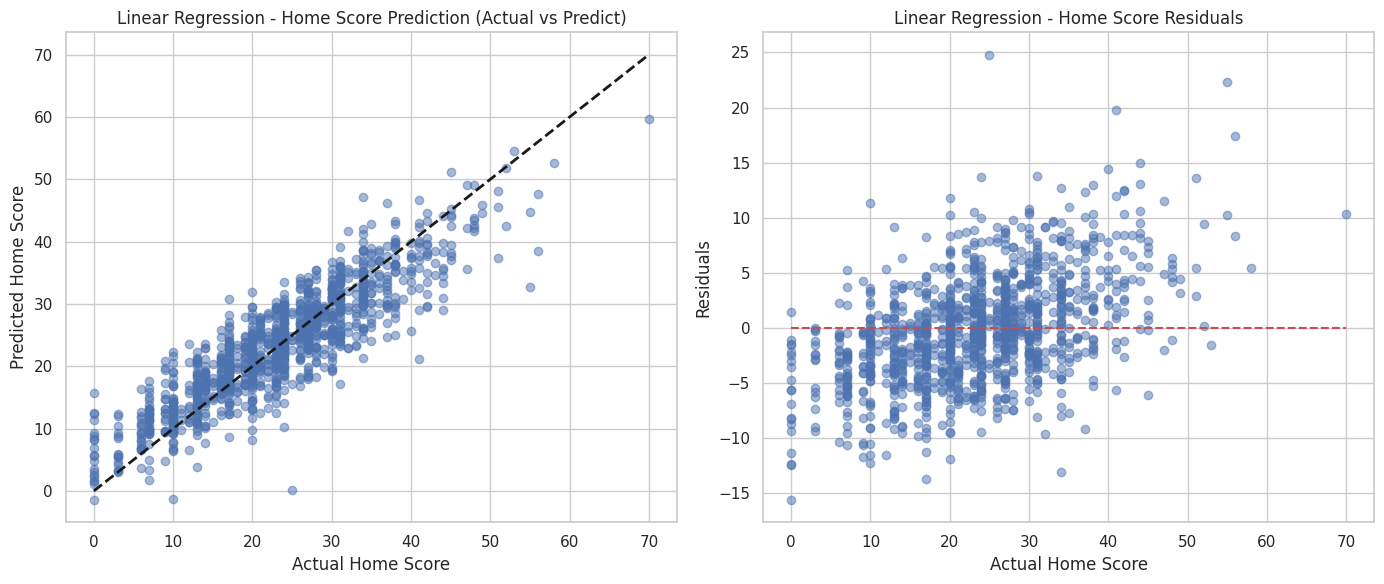


Training Linear Regression for Away Score Prediction.
Linear Regression - Away Score Prediction Results:
Mean Squared Error (MSE): 22.29
Mean Absolute Error (MAE): 3.70
Root Mean Squared Error (RMSE): 4.72


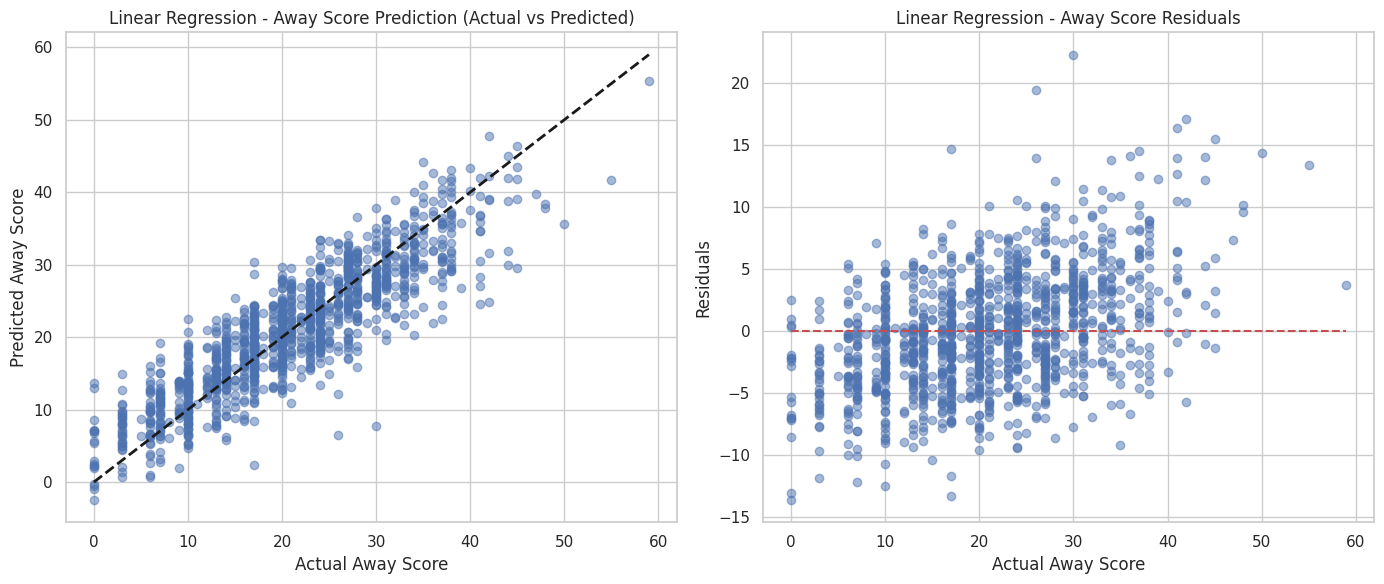


Training Random Forest for Home Score Prediction:
Random Forest - Home Score Prediction Results:
Mean Squared Error (MSE): 28.52
Mean Absolute Error (MAE): 4.15
Root Mean Squared Error (RMSE): 5.34


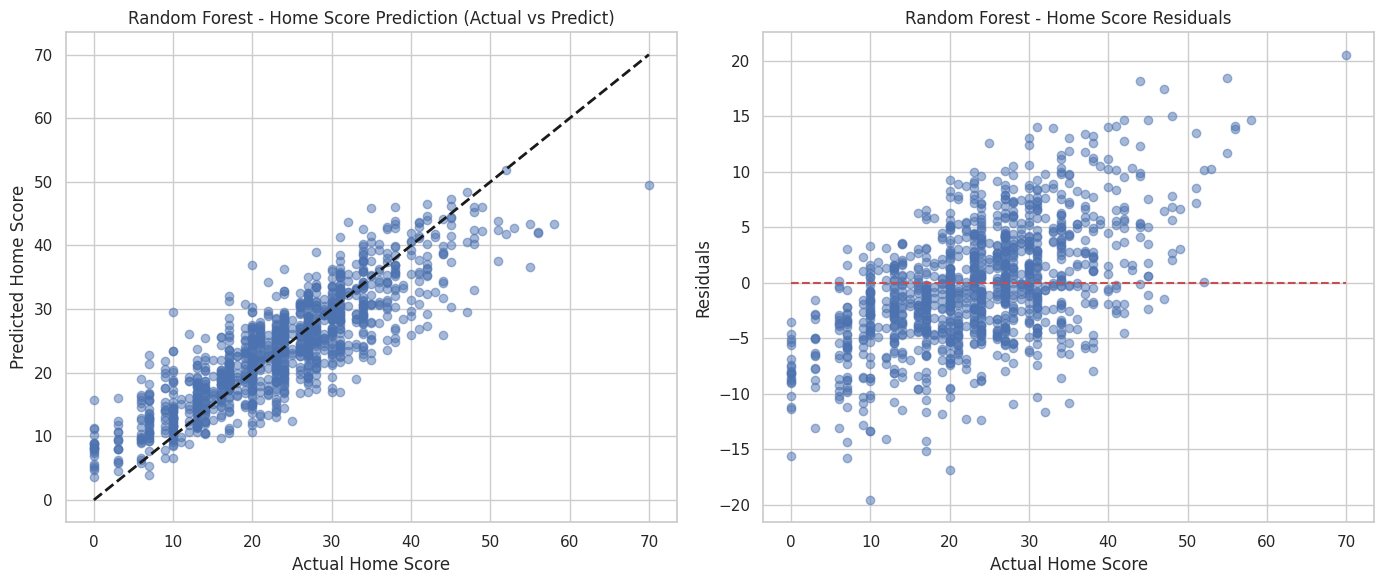


Training Random Forest for Away Score Prediction.
Random Forest - Away Score Prediction Results:
Mean Squared Error (MSE): 25.86
Mean Absolute Error (MAE): 4.03
Root Mean Squared Error (RMSE): 5.09


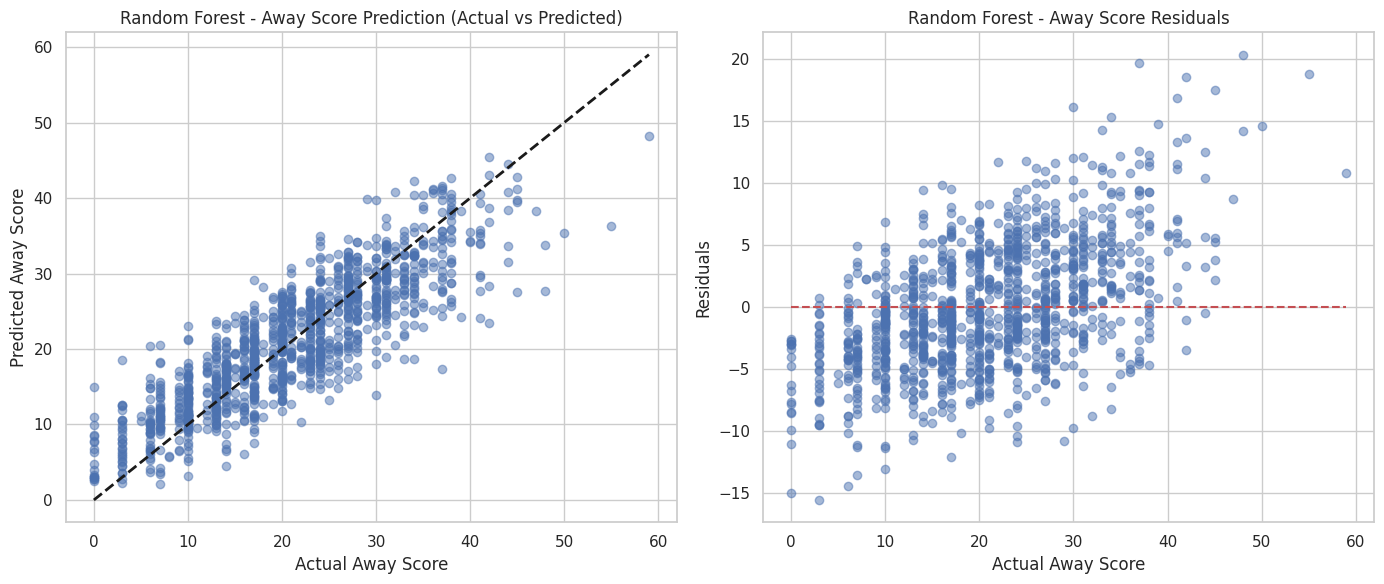


Training Gradient Boosting for Home Score Prediction:
Gradient Boosting - Home Score Prediction Results:
Mean Squared Error (MSE): 24.50
Mean Absolute Error (MAE): 3.88
Root Mean Squared Error (RMSE): 4.95


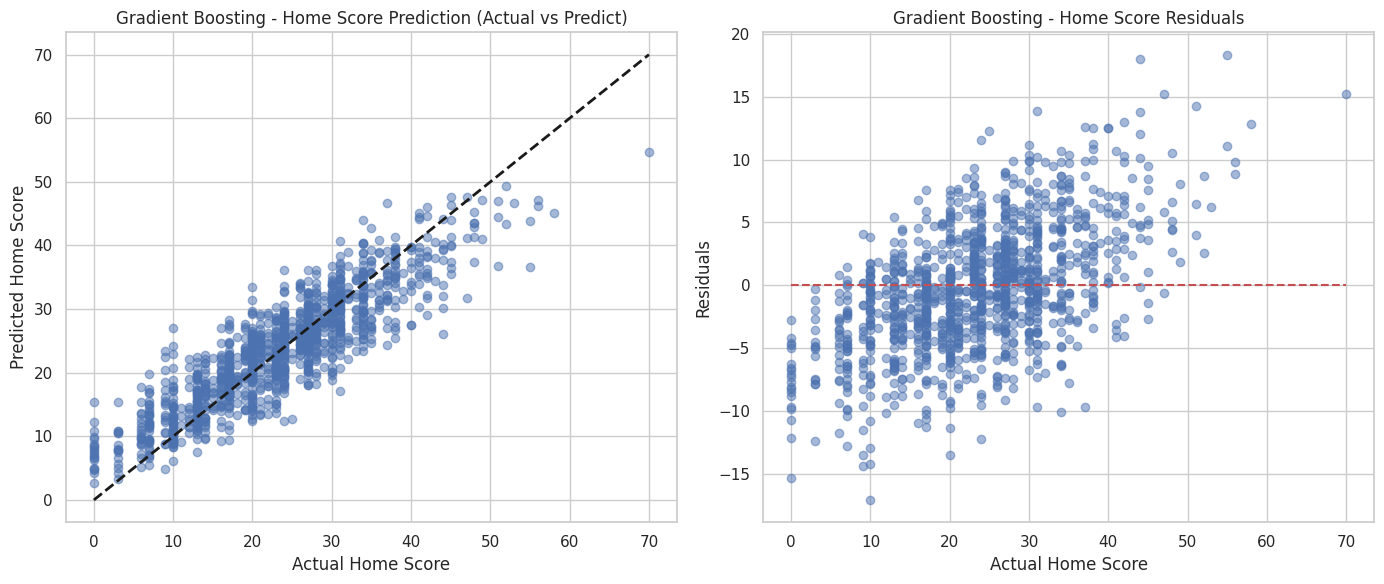


Training Gradient Boosting for Away Score Prediction.
Gradient Boosting - Away Score Prediction Results:
Mean Squared Error (MSE): 23.64
Mean Absolute Error (MAE): 3.84
Root Mean Squared Error (RMSE): 4.86


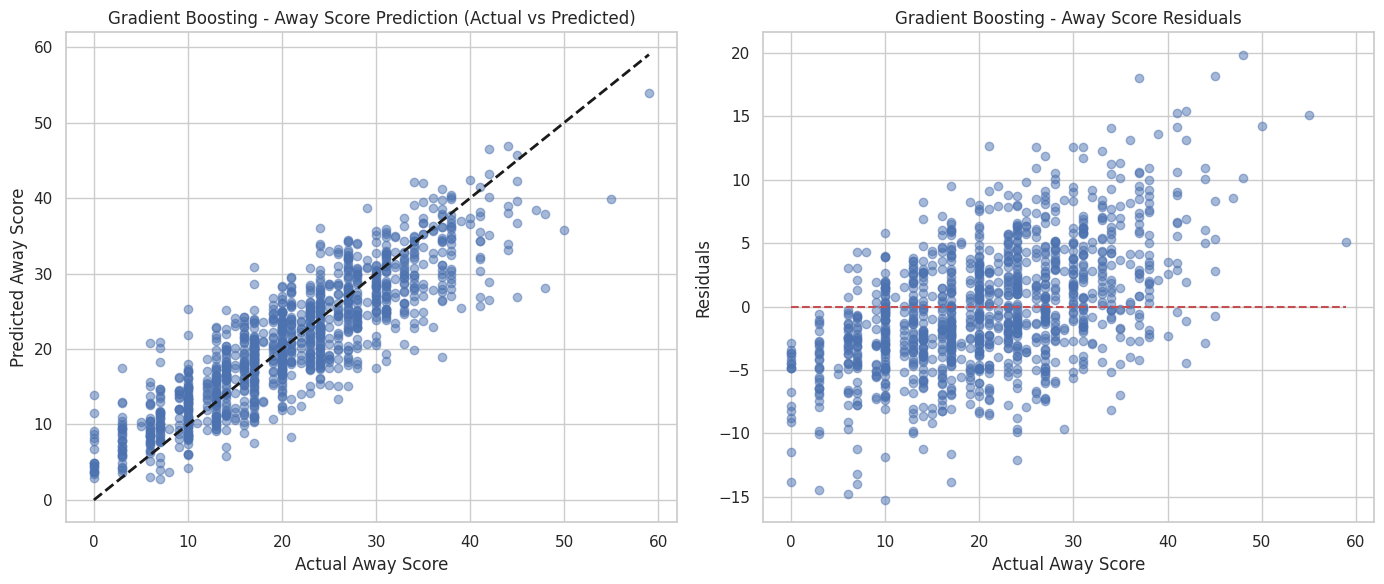


Training Decision Tree for Home Score Prediction:
Decision Tree - Home Score Prediction Results:
Mean Squared Error (MSE): 56.75
Mean Absolute Error (MAE): 5.87
Root Mean Squared Error (RMSE): 7.53


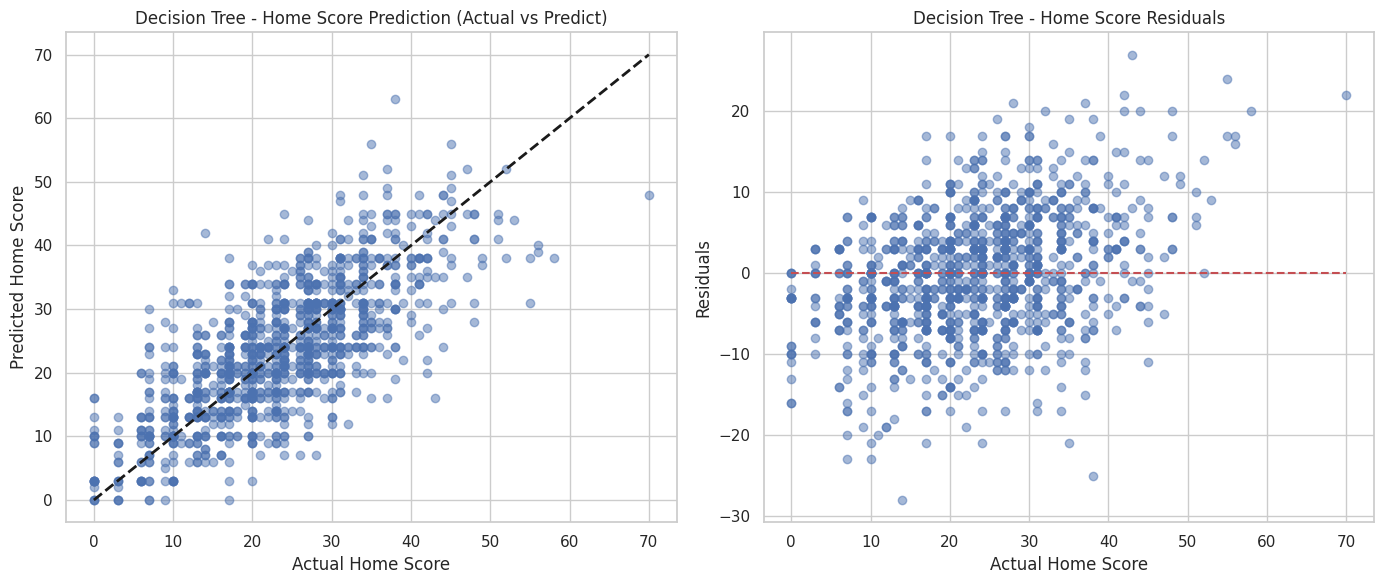


Training Decision Tree for Away Score Prediction.
Decision Tree - Away Score Prediction Results:
Mean Squared Error (MSE): 51.71
Mean Absolute Error (MAE): 5.60
Root Mean Squared Error (RMSE): 7.19


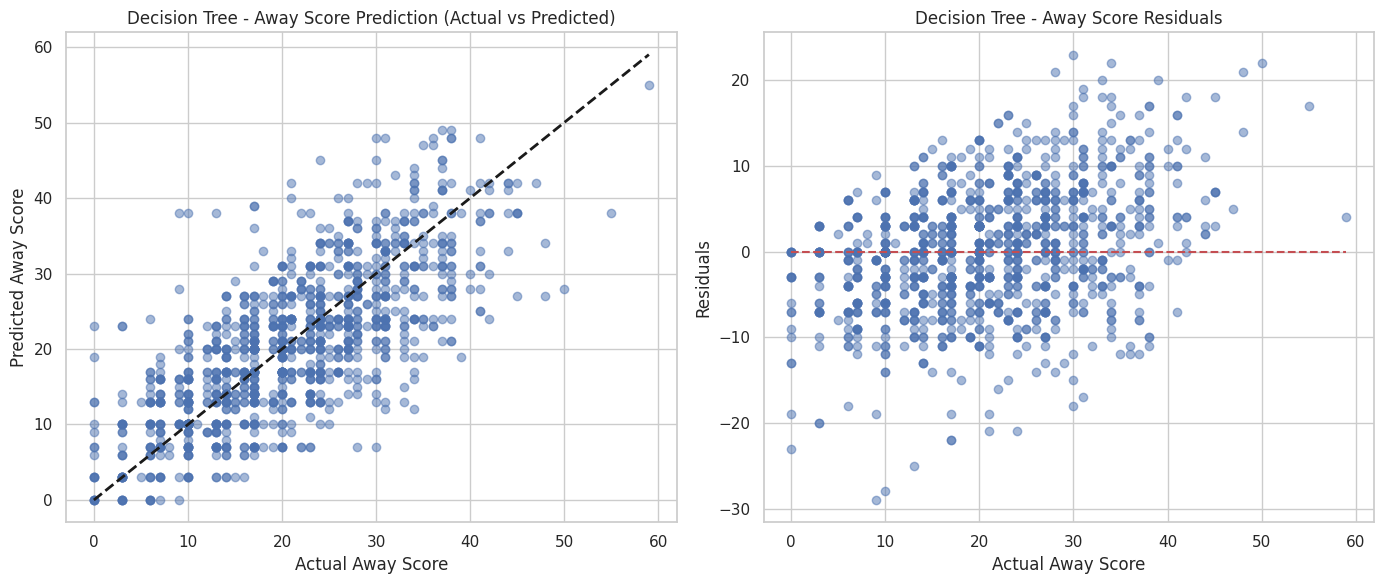


Training K-Nearest Neighbors for Home Score Prediction:
K-Nearest Neighbors - Home Score Prediction Results:
Mean Squared Error (MSE): 37.81
Mean Absolute Error (MAE): 4.86
Root Mean Squared Error (RMSE): 6.15


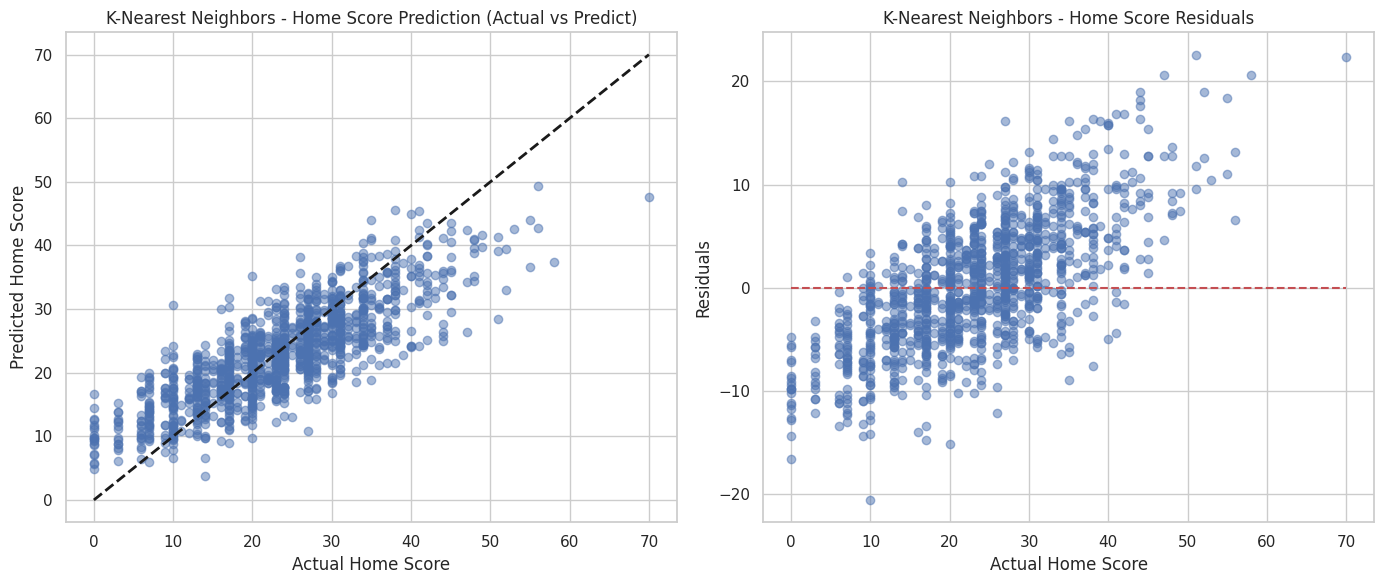


Training K-Nearest Neighbors for Away Score Prediction.
K-Nearest Neighbors - Away Score Prediction Results:
Mean Squared Error (MSE): 35.94
Mean Absolute Error (MAE): 4.68
Root Mean Squared Error (RMSE): 5.99


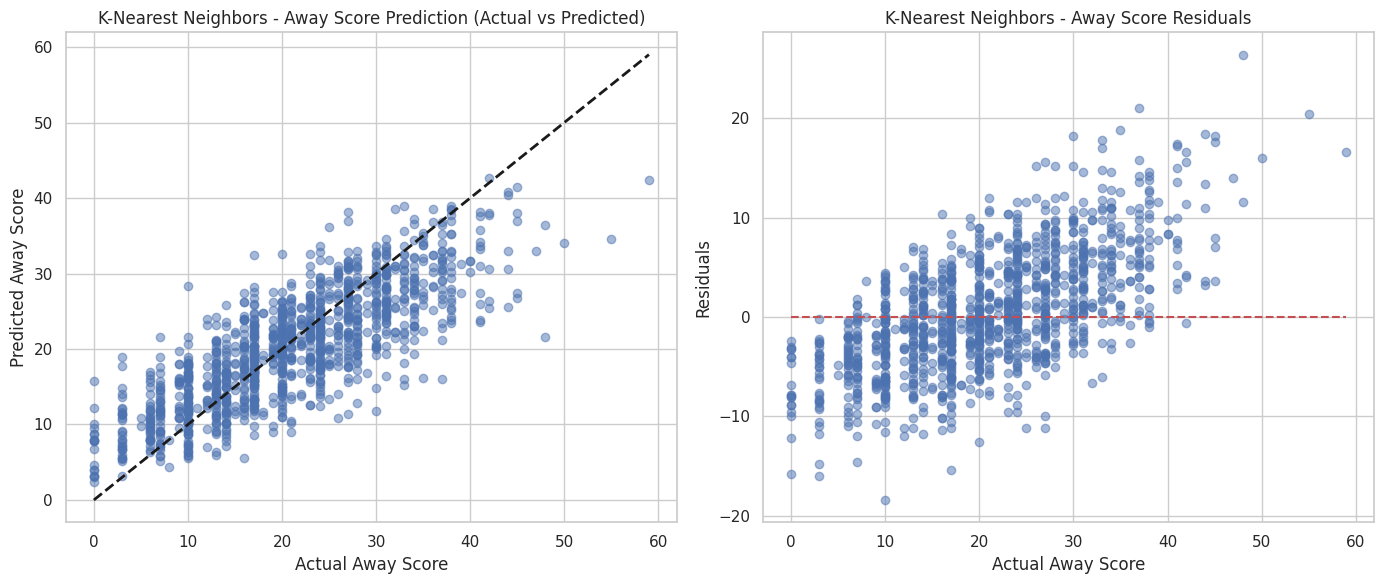

In [51]:
### dictionary of regressors

regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


for name, reg in regressors.items():
    print(f'\nTraining {name} for Home Score Prediction:')


    reg.fit(X_train_home, y_train_home) ### fit each model
    y_pred_home = reg.predict(X_test_home) ### predict on test data

    ### obtain metrics(mse, mae, rmse)
    mse_home = mean_squared_error(y_test_home, y_pred_home)
    mae_home = mean_absolute_error(y_test_home, y_pred_home)
    rmse_home = np.sqrt(mse_home)

    print(f'{name} - Home Score Prediction Results:')
    print(f'Mean Squared Error (MSE): {mse_home:.2f}')
    print(f'Mean Absolute Error (MAE): {mae_home:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse_home:.2f}')

    ### visualize
    plt.figure(figsize=(14, 6))

    ### scatter plot of actual values vs predicted values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test_home, y_pred_home, alpha=0.5)
    plt.plot([y_test_home.min(), y_test_home.max()], [y_test_home.min(), y_test_home.max()], 'k--', lw=2)
    plt.xlabel('Actual Home Score')
    plt.ylabel('Predicted Home Score')
    plt.title(f'{name} - Home Score Prediction (Actual vs Predict)')

    ### residuals agains actual values of score_home
    plt.subplot(1, 2, 2)
    residuals_home = y_test_home - y_pred_home
    plt.scatter(y_test_home, residuals_home, alpha=0.5)
    plt.hlines(0, y_test_home.min(), y_test_home.max(), colors='r', linestyles='--')
    plt.xlabel('Actual Home Score')
    plt.ylabel('Residuals')
    plt.title(f'{name} - Home Score Residuals')

    plt.tight_layout()
    plt.show()



    ### same steps for score_away
    print(f'\nTraining {name} for Away Score Prediction.')
    reg.fit(X_train_away, y_train_away)
    y_pred_away = reg.predict(X_test_away)


    mse_away = mean_squared_error(y_test_away, y_pred_away)
    mae_away = mean_absolute_error(y_test_away, y_pred_away)
    rmse_away = np.sqrt(mse_away)

    print(f'{name} - Away Score Prediction Results:')
    print(f'Mean Squared Error (MSE): {mse_away:.2f}')
    print(f'Mean Absolute Error (MAE): {mae_away:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse_away:.2f}')


    plt.figure(figsize=(14, 6))


    plt.subplot(1, 2, 1)
    plt.scatter(y_test_away, y_pred_away, alpha=0.5)
    plt.plot([y_test_away.min(), y_test_away.max()], [y_test_away.min(), y_test_away.max()], 'k--', lw=2)
    plt.xlabel('Actual Away Score')
    plt.ylabel('Predicted Away Score')
    plt.title(f'{name} - Away Score Prediction (Actual vs Predicted)')


    plt.subplot(1, 2, 2)
    residuals_away = y_test_away - y_pred_away
    plt.scatter(y_test_away, residuals_away, alpha=0.5)
    plt.hlines(0, y_test_away.min(), y_test_away.max(), colors='r', linestyles='--')
    plt.xlabel('Actual Away Score')
    plt.ylabel('Residuals')
    plt.title(f'{name} - Away Score Residuals')

    plt.tight_layout()
    plt.show()

In [52]:
### table for home metrics
results_home = []
for name, reg in regressors.items():
    reg.fit(X_train_home, y_train_home)
    y_pred_home = reg.predict(X_test_home)
    mse_home = mean_squared_error(y_test_home, y_pred_home)
    mae_home = mean_absolute_error(y_test_home, y_pred_home)
    rmse_home = np.sqrt(mse_home)
    r2_home = reg.score(X_test_home, y_test_home)
    results_home.append([name, mse_home, mae_home, rmse_home,r2_home])

results_df_home = pd.DataFrame(results_home, columns=['Model', 'MSE', 'MAE', 'RMSE', "R-squared"])
print(results_df_home)


print("\n" + "-" * 50 + "\n")

### table for away metrics
results_away = []
for name, reg in regressors.items():
    reg.fit(X_train_away, y_train_away)
    y_pred_away = reg.predict(X_test_away)
    mse_away = mean_squared_error(y_test_away, y_pred_away)
    mae_away = mean_absolute_error(y_test_away, y_pred_away)
    rmse_away = np.sqrt(mse_away)
    r2_away = reg.score(X_test_away, y_test_away)
    results_away.append([name, mse_away, mae_away, rmse_away,r2_away])

results_df_away = pd.DataFrame(results_away, columns=['Model', 'MSE', 'MAE', 'RMSE', "R-squared"])
print(results_df_away)

                 Model        MSE       MAE      RMSE  R-squared
0    Linear Regression  23.936883  3.791597  4.892533   0.780810
1        Random Forest  28.520977  4.145978  5.340503   0.738834
2    Gradient Boosting  24.500606  3.879747  4.949809   0.775648
3        Decision Tree  56.747049  5.871838  7.533064   0.480368
4  K-Nearest Neighbors  37.811804  4.863069  6.149130   0.653758

--------------------------------------------------

                 Model        MSE       MAE      RMSE  R-squared
0    Linear Regression  22.289615  3.701319  4.721188   0.772550
1        Random Forest  25.858738  4.025540  5.085149   0.736129
2    Gradient Boosting  23.642368  3.837210  4.862342   0.758746
3        Decision Tree  51.714165  5.597808  7.191256   0.472292
4  K-Nearest Neighbors  35.935245  4.680270  5.994601   0.633305


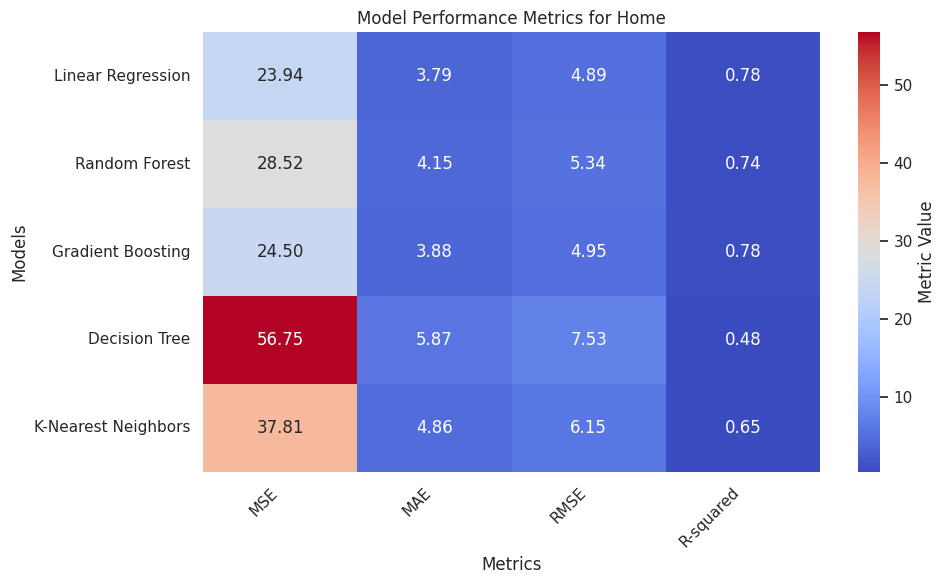

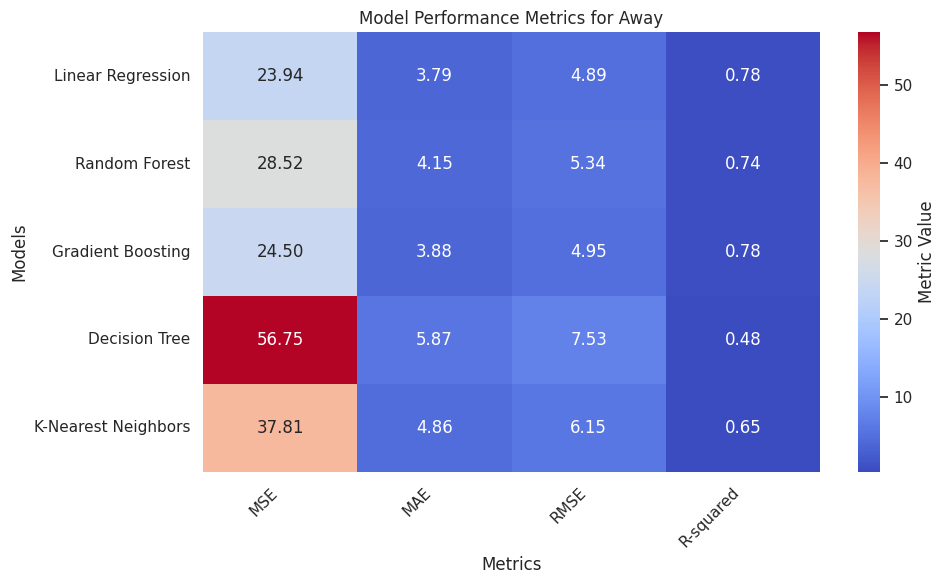

In [53]:
### Heatmap provides consice info on metrics
### we can do bar graphs as well


##### Home

### setting model names as index
results_df_home.set_index('Model', inplace=True)


plt.figure(figsize=(10, 6))
sns.heatmap(results_df_home, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Metric Value'})


plt.title("Model Performance Metrics for Home")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()




### Away

results_df_away.set_index('Model', inplace=True)


plt.figure(figsize=(10, 6))
sns.heatmap(results_df_home, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Metric Value'})


plt.title("Model Performance Metrics for Away")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()